# Projet 6 - Analysez les ventes d'une librairie avec R ou Python

## Sommaire

* [Étape 1 - Visualisation et Nettoyage des données](#chapitre_1)
    * [Visualisation des données de nos 3 Dataframes](#section_1_1)
        * [Visualisation de customers](#section_1_1_1)
        * [Visualisation de products](#section_1_1_2)
        * [Visualisation de transactions](#section_1_1_3)
    * [Nettoyage des données de nos 3 Dataframes](#section_1_2)
        * [Nettoyage de customers](#section_1_2_1)
        * [Nettoyage de products](#section_1_2_2)
        * [Nettoyage de transactions](#section_1_2_3)
* [Étape 2 - Analyse des différents indicateurs de vente](#chapitre_2)
    * [Jointure de products et transactions](#section_2_1)
        * [Jointure des DataFrames](#section_2_1_1)
        * [Anomalie après jointure](#section_2_1_2)
        * [Correction de l'anomalie](#section_2_1_3)
    * [Analyse de l'évolution du Chiffres d'Affaires (CA)](#section_2_2)
        * [Agrégation mensuelle et visualisation du CA](#section_2_2_1)
        * [Anomalie sur le mois d'Octobre](#section_2_2_2)
        * [Correction de l'anomalie du CA](#section_2_2_3)
    * [Visualisation des tops et flops produits par CA et nombre de ventes](#section_2_3)
        * [Préparation du DataFrame préalable au top et flop](#section_2_3_1)
        * [Visualisation du top produit](#section_2_3_2)
        * [Visualisation du flop produit](#section_2_3_3)
    * [Répartition du CA par produit et par catégorie](#section_2_4)
        * [Courbe de Lorenz de répartition du CA par produit](#section_2_4_1)
        * [Indice de Gini de répartition du CA par produit](#section_2_4_2)
        * [Courbe de Pareto du CA par produit et Répartition par catégorie](#section_2_4_3)
    * [Analyse des profils des clients](#section_2_5)
        * [Jointure de products_transactions, customers et âge des clients](#section_2_5_1)
        * [Top et flop clients, achat moyen et panier moyen par client](#section_2_5_2)
        * [Répartition du CA entre les clients (Courbe de Lorenz) et indice de Gini](#section_2_5_3)
    * [Analyse des clients institutionnels](#section_2_6)
        * [Créations des dataframes normal et institutionnel, CA et nombre de transactions (en pourcentage)](#section_2_6_1)
        * [Impact des clients institutionnels sur la Courbe de Lorenz et l'indice de Gini](#section_2_6_2)
        * [Caractéristiques des clients institutionnels](#section_2_6_3)
* [Étape 3 - Étude des liens entre les différentes variables](#chapitre_3)
    * [Lien entre le genre d’un client et les catégories des livres achetés](#section_3_1)
        * [Tableau de contigence entre le genre d'un client et les catégories de livres achetés](#section_3_1_1)
        * [Heatmap de la relation entre le genre d'un client et les catégories de livres achetés](#section_3_1_2)
        * [Test d'indépendance du Khi-2](#section_3_1_3)
    * [Lien entre l'âge des clients et le montant total des achats](#section_3_2)
        * [Création du Dataframe préalable à la représentation graphique](#section_3_2_1)
        * [Coefficient de Pearson et covariance entre âge et montant total des achats](#section_3_2_2)
        * [Graphique du lien entre l'âge des clients et le montant total des achats](#section_3_2_3)
    * [Lien entre âge des clients et fréquence d'achat](#section_3_3)
        * [Création d'un nouveau Dataframe préalable à la représentation graphique](#section_3_3_1)
        * [Représentation graphique du lien entre âge des clients et fréquence d'achat](#section_3_3_2)
        * [Coefficient de Pearson et covariance entre âge et fréquence des achats](#section_3_3_3)
    * [Lien entre l'âge et la taille du panier moyen](#section_3_4)
        * [Création d'un nouveau Dataframe préalable à la représentation graphique](#section_3_4_1)
        * [Représentation graphique du lien entre l'âge et la taille du panier moyen](#section_3_4_2)
        * [Coefficient de Pearson et covariance entre âge et panier moyen](#section_3_4_3)
    * [Lien entre l'âge et la catégorie de livres achetés](#section_3_5)
        * [Représentation graphique des distribution des âges par catégorie](#section_3_5_1)
        * [Analysis of Variance (ANOVA)](#section_3_5_2)

### Étape 1 - Visualisation et Nettoyage des données <a class="anchor" id="chapitre_1"></a>

In [1]:
import numpy as np #On importe les bibliothèques correspondantes ainsi que le module Re
import pandas as pd
import seaborn as sns
import re
import datetime as dt
import scipy.stats as st
import matplotlib.pyplot as plt
import math as mth

In [2]:
customers = pd.read_csv("customers.csv") #On importe les fichiers CSV correspondants à savoir customers,...
products = pd.read_csv("products.csv") #products,...
transactions = pd.read_csv("transactions.csv") #et transactions.

#### Visualisation des données de nos 3 Dataframes <a class="anchor" id="section_1_1"></a>

#### Visualisation de customers <a class="anchor" id="section_1_1_1"></a>

In [3]:
#On vérifie le DataFrame customers
#On explore les données du DF customers
print("Informations du DataFrame customers : \n")
print(customers.info())
print("-----------------------------------------------------------------------------")
print("Affichage du DataFrame customers : \n")
#On affiche le DF customers
print (customers.head())

Informations du DataFrame customers : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB
None
-----------------------------------------------------------------------------
Affichage du DataFrame customers : 

  client_id sex  birth
0    c_4410   f   1967
1    c_7839   f   1975
2    c_1699   f   1984
3    c_5961   f   1962
4    c_5320   m   1943


#### Visualisation de products <a class="anchor" id="section_1_1_2"></a>

In [4]:
#On vérifie le DataFrame products
#On explore les données du DF products
print("Informations du DataFrame products : \n")
print(products.info())
print("-----------------------------------------------------------------------------")
print("Affichage du DataFrame products : \n")
#On affiche le DF products
print (products.head())

Informations du DataFrame products : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB
None
-----------------------------------------------------------------------------
Affichage du DataFrame products : 

  id_prod  price  categ
0  0_1421  19.99      0
1  0_1368   5.13      0
2   0_731  17.99      0
3   1_587   4.99      1
4  0_1507   3.99      0


#### Visualisation de transactions <a class="anchor" id="section_1_1_3"></a>

In [5]:
#On vérifie le DataFrame transactions
#On explore les données du DF transactions
print("Informations du DataFrame transactions : \n")
print(transactions.info())
print("-----------------------------------------------------------------------------")
print("Affichage du DataFrame transactions : \n")
#On affiche le DF transactions
print (transactions.head())

Informations du DataFrame transactions : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB
None
-----------------------------------------------------------------------------
Affichage du DataFrame transactions : 

  id_prod                        date session_id client_id
0  0_1518  2022-05-20 13:21:29.043970   s_211425     c_103
1   1_251  2022-02-02 07:55:19.149409   s_158752    c_8534
2  0_1277  2022-06-18 15:44:33.155329   s_225667    c_6714
3   2_209  2021-06-24 04:19:29.835891    s_52962    c_6941
4  0_1509  2023-01-11 08:22:08.194479   s_325227    c_4232


#### Nettoyage des données de nos 3 Dataframes <a class="anchor" id="section_1_2"></a>

#### Nettoyage de customers <a class="anchor" id="section_1_2_1"></a>

In [6]:
#Vérification des doublons dans le DF customers
print(customers.duplicated().sum())

0


Il n'y a pas de doublons dans le DF customers.

In [7]:
#Recherchons maintenant les valeurs manquantes dans le DF customers
print(customers.isnull().sum())

client_id    0
sex          0
birth        0
dtype: int64


Il n'y a pas de valeurs manquantes dans le DataFrame customers.

In [8]:
#Vérifions maintenant les clients_id dans le DF customers sur les 5 premières lignes
customers.sort_values('client_id', ascending = False).head()

,client_id,sex,birth
8494,ct_1,m,2001
2735,ct_0,f,2001
7358,c_999,m,1964
2145,c_998,m,2001
94,c_997,f,1994


In [9]:
#Vérifions maintenant les clients_id dans le DF customers sur les 5 dernières lignes
customers.sort_values('client_id', ascending = False).tail()

,client_id,sex,birth
3426,c_1001,m,1982
8472,c_1000,f,1966
2137,c_100,m,1992
6894,c_10,m,1956
4299,c_1,m,1955


Les id "ct_1" et "ct_0" semblent être de faux identifiants puisqu'ils différent de tous les autres.

In [10]:
#Supprimons les deux lignes concernés par ces anomalies
customers = customers[(customers.client_id != 'ct_0') & (customers.client_id != 'ct_1')]

In [11]:
#Regardons l'âge des clients
print(customers.sort_values(by='birth', ascending=False).head())
print(customers.sort_values(by='birth', ascending=True).head())

     client_id sex  birth
7078    c_8245   f   2004
6330    c_2854   m   2004
445     c_2627   m   2004
1787    c_7916   f   2004
2947     c_308   f   2004
     client_id sex  birth
4569     c_577   m   1929
2491    c_8362   f   1929
418     c_5302   m   1929
1086    c_3218   f   1930
5138    c_7232   f   1930


Il n'y a pas d'anomalie au niveau de l'âge.

#### Nettoyage de products <a class="anchor" id="section_1_2_2"></a>

In [12]:
#Vérification des doublons dans le DF products
print(products.duplicated().sum())

0


Il n'y a pas de doublons dans le DF products.

In [13]:
#Recherchons maintenant les valeurs manquantes dans le DF products
print(products.isnull().sum())

id_prod    0
price      0
categ      0
dtype: int64


Il n'y a pas de valeurs manquantes dans le DataFrame products.

In [14]:
#Vérifions maintenant les id_prod dans le DF products sur les 5 premières lignes
products.sort_values('id_prod', ascending = False).head()

,id_prod,price,categ
731,T_0,-1.00,0
3188,2_99,84.99,2
3088,2_98,149.74,2
2698,2_97,160.99,2
2576,2_96,47.91,2


In [15]:
#Vérifions maintenant les id_prod dans le DF products sur les 5 dernières lignes
products.sort_values('id_prod', ascending = False).tail()

,id_prod,price,categ
922,0_1000,6.84,0
663,0_100,20.60,0
2691,0_10,17.95,0
803,0_1,10.99,0
1001,0_0,3.75,0


Le prix ne peut pas être négatif on va donc supprimer la ligne correspondante.

In [16]:
#Supprimons la ligne 731
products = products[products.id_prod != 'T_0']

In [17]:
#Vérifions s'il n'y a pas d'autres valeurs aberrantes au niveau des prix
print(products.price.min())
print(products.price.max())

0.62
300.0


Pas d'autre anomalie sur les prix des produits.

#### Nettoyage de transactions <a class="anchor" id="section_1_2_3"></a>

In [18]:
#Vérification des doublons dans le DF transactions
print(transactions.duplicated().sum())

126


On voit qu'on  a 126 doublons dans le DF Transactions.

In [19]:
#Recherchons maintenant les valeurs manquantes dans le DF transactions
print(transactions.isnull().sum())

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64


Il n'y a pas de valeurs manquantes dans le DataFrame Transactions.

In [20]:
#Vérifions maintenant les client_id dans le DF transactions sur les 5 premières lignes
transactions.sort_values('client_id', ascending = False).head()

,id_prod,date,session_id,client_id
638483,T_0,test_2021-03-01 02:30:02.237444,s_0,ct_1
589180,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_1
338563,T_0,test_2021-03-01 02:30:02.237433,s_0,ct_1
245235,T_0,test_2021-03-01 02:30:02.237415,s_0,ct_1
525297,T_0,test_2021-03-01 02:30:02.237418,s_0,ct_1


In [21]:
#Vérifions maintenant les client_id dans le DF transactions sur les 5 dernières lignes
transactions.sort_values('client_id', ascending = False).tail()

,id_prod,date,session_id,client_id
673656,0_2277,2021-09-06 18:34:16.975976,s_85977,c_1
620939,1_425,2021-12-25 03:53:43.623598,s_139610,c_1
72185,0_2277,2022-10-06 18:34:16.975976,s_278688,c_1
488625,0_513,2022-12-21 22:41:38.769525,s_315508,c_1
318987,0_1880,2021-11-04 18:37:01.482109,s_114737,c_1


On voit qu'il y a des valeurs fausses qui correspondent en fait à des tests.

In [22]:
#Supprimons ces valeurs test
transactions = transactions[transactions.id_prod != 'T_0']

In [23]:
#Convertissons les données de date
transactions['date'] = pd.to_datetime(transactions.date, format='%Y-%m-%d %H:%M:%S', errors = 'coerce')
#errors = coerce renvoie un NaN si la conversion est impossible

#Vérifions que la conversion s'est bien faite
print("Type des données : \n")
print(transactions.dtypes)
print("-------------------------------------------------------------")
print("Nombre de valeurs nulles pour la date : \n")
print(transactions.date.isnull().sum())

Type des données : 

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
dtype: object
-------------------------------------------------------------
Nombre de valeurs nulles pour la date : 

0


In [24]:
#Revérification des doublons dans le DF transactions
print(transactions.duplicated().sum())

0


On peut donc en conclure qu'à part les valeurs test, il n'y a pas d'anomalie.

### Étape 2 - Analyse des différents indicateurs de vente <a class="anchor" id="chapitre_2"></a>

#### Jointure de products et transactions <a class="anchor" id="section_2_1"></a>

#### Jointures des DataFrames <a class="anchor" id="section_2_1_1"></a>

In [25]:
#On fait la jointure de products et transactions
products_transactions = pd.merge(products, transactions, on='id_prod', how='right')
products_transactions.head()

,id_prod,price,categ,date,session_id,client_id
0,0_1518,4.18,0.0,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,15.99,1.0,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,7.99,0.0,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,69.99,2.0,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,4.99,0.0,2023-01-11 08:22:08.194479,s_325227,c_4232


#### Anomalie après jointure <a class="anchor" id="section_2_1_2"></a>

In [26]:
#On recherche d'éventuelles valeurs manquantes après la jointure
products_transactions.isnull().sum()

id_prod         0
price         221
categ         221
date            0
session_id      0
client_id       0
dtype: int64

In [27]:
#On crée un miniDf incluant uniquement les valeurs manquantes
valeurs_manquantes = products_transactions[products_transactions.categ.isnull() == True]

In [28]:
#On cherche le produit concerné par ces valeurs manquantes
valeurs_manquantes.id_prod.unique()

array(['0_2245'], dtype=object)

On voit que seul le produit ayant pour id_produit 0_2245 est concerné par ces valeurs manquantes.

#### Correction de l'anomalie <a class="anchor" id="section_2_1_3"></a>

In [29]:
#Le produit 0_2245 appartient à la catégorie 0 on remplace donc les valeurs manquantes de la variable "catégorie" par 0
products_transactions['categ'] = products_transactions.categ.fillna(0)

In [30]:
#On remplace les valeurs manquantes au niveau du prix par le prix moyen pour éviter de perturber l'analyse
products_transactions['price'] = products_transactions.price.fillna(products_transactions[products_transactions['categ'] == 0].price.mean())
print(products_transactions[products_transactions['categ'] == 0].price.mean())

10.638188052306754


In [31]:
#On revérifie les valeurs manquantes
products_transactions.isnull().sum()

id_prod       0
price         0
categ         0
date          0
session_id    0
client_id     0
dtype: int64

#### Analyse de l'évolution du Chiffres d'Affaires (CA) <a class="anchor" id="section_2_2"></a>

#### Agrégation mensuelle et visualisation du CA <a class="anchor" id="section_2_2_1"></a>

In [32]:
#On groupe les données en données mensuelles (agrégation) 
products_transactions_mois = products_transactions.groupby(pd.Grouper(key='date', freq='M')).sum().reset_index()
#On convertit les données de CA en milliers
products_transactions_mois['Ventes_en_Keuros'] = products_transactions_mois.price / 1000
#On ne garde que les colonnes date et Ventes en Keuros
products_transactions_mois = products_transactions_mois[['date', 'Ventes_en_Keuros']]
#On crée une nouvelle colonne Moyenne Mobile trimestrielle
products_transactions_mois['Moyenne Mobile trimestrielle'] = products_transactions_mois.Ventes_en_Keuros.rolling(3).mean()

products_transactions_mois.head(40)

,date,Ventes_en_Keuros,Moyenne Mobile trimestrielle
0,2021-03-31,482.536354,NaN
1,2021-04-30,476.258235,NaN
2,2021-05-31,493.028576,483.941055
3,2021-06-30,484.163027,484.483279
4,2021-07-31,482.877953,486.689852
5,2021-08-31,482.380534,483.140505
6,2021-09-30,507.368338,490.875608
7,2021-10-31,320.873207,436.874026
8,2021-11-30,516.274112,448.171886
9,2021-12-31,525.991747,454.379689


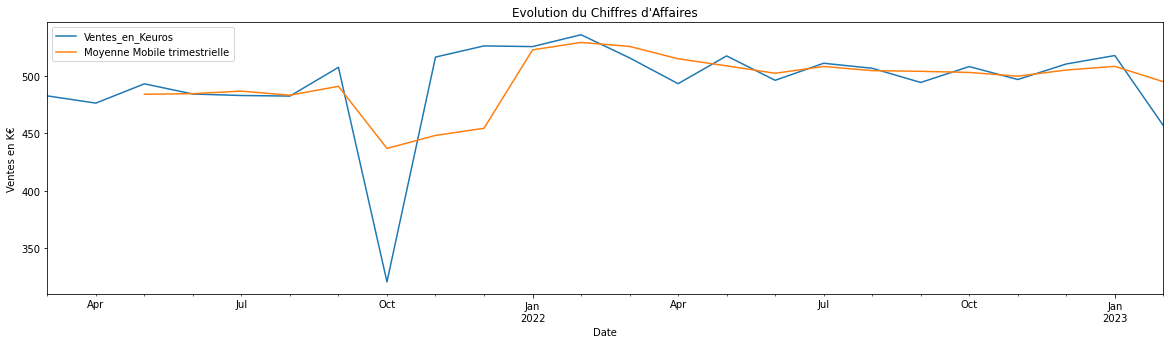

In [33]:
#On crée un graphique avec l'évolution du CA

fig, ax = plt.subplots(figsize=(20, 5))
products_transactions_mois.plot(x='date', y='Ventes_en_Keuros', ax=ax)
products_transactions_mois.plot(x='date', y='Moyenne Mobile trimestrielle', ax=ax)
plt.title("Evolution du Chiffres d'Affaires")
plt.xlabel('Date')
plt.ylabel('Ventes en K€')

plt.show()

On voit qu'on a une baisse considérable du Chiffre d'Affaires sur le mois d'Octobre 2021, on va essayer d'en déterminer la cause.

#### Anomalie sur le mois d'Octobre <a class="anchor" id="section_2_2_2"></a>

In [34]:
#On va compter le nombre de transactions au mois d'Octobre
transactions_octobre = len(products_transactions[(products_transactions.date > '2021-09-30') & \
                                                   (products_transactions.date < '2021-11-01')])
print(transactions_octobre)

22917


In [35]:
#On va compter le nombre de transactions au mois de Septembre
transactions_septembre = len(products_transactions[(products_transactions.date > '2021-08-31') & \
                                                   (products_transactions.date < '2021-10-01')])
print(transactions_septembre)

34148


On voit clairement qu'il y a une baisse conséquente du nombre de transactions, essayons d'en savoir plus.

In [36]:
#On crée les colonnes "Année", "Mois" et "Jour" pour créer un nouveau DF par la suite
products_transactions["Année"] = products_transactions["date"].dt.year
products_transactions["Mois"] = products_transactions["date"].dt.month
products_transactions["Jour"] = products_transactions["date"].dt.day

In [37]:
#On crée un nouveau DF par catégorie avec deux fonctions d'agrégation l'une pour calculer le CA par catégorie (sum) et l'autre 
# pour calculer le nombre de transaction (count)
#On ne garde que les colonnes utiles
Cat_ag = products_transactions[["categ", "price", "Année", "Mois"]]
#On utilise les fonctions d'agrégation avec un tableau croisé dynamique
Cat_ag = pd.pivot_table(Cat_ag, index=["Année","Mois"], columns=["categ"], aggfunc=["sum", "count"]).reset_index()
#On renomme les colonnes utiles
Cat_ag.columns=["Année", "Mois", "Catégorie 0 (CA)", "Catégorie 1 (CA)", "Catégorie 2 (CA)", "Volume Catégorie 0", "Volume Catégorie 1", "Volume Catégorie 2"]
Cat_ag.head(24)


,Année,Mois,Catégorie 0 (CA),Catégorie 1 (CA),Catégorie 2 (CA),Volume Catégorie 0,Volume Catégorie 1,Volume Catégorie 2
0,2021,3,193724.913692,186974.17,101837.27,18140,9134,1336
1,2021,4,205371.394633,156138.35,114748.49,19356,7579,1522
2,2021,5,196271.825504,165893.40,130863.35,18509,8107,1677
3,2021,6,168017.617316,189162.04,126983.37,15905,9264,1688
4,2021,7,144793.342752,188523.27,149561.34,13582,9169,1991
5,2021,8,167833.363692,162991.38,151555.79,15737,7954,1968
6,2021,9,246481.568257,190613.78,70272.99,23154,9268,904
7,2021,10,199325.297316,33762.32,87785.59,18769,1666,1171
8,2021,11,156015.941881,252910.39,107347.78,14610,12316,1395
9,2021,12,206110.707316,251026.75,68854.29,19309,12259,896


Text(0.5, 1.0, 'Évolution du CA par catégorie (base mensuelle)')

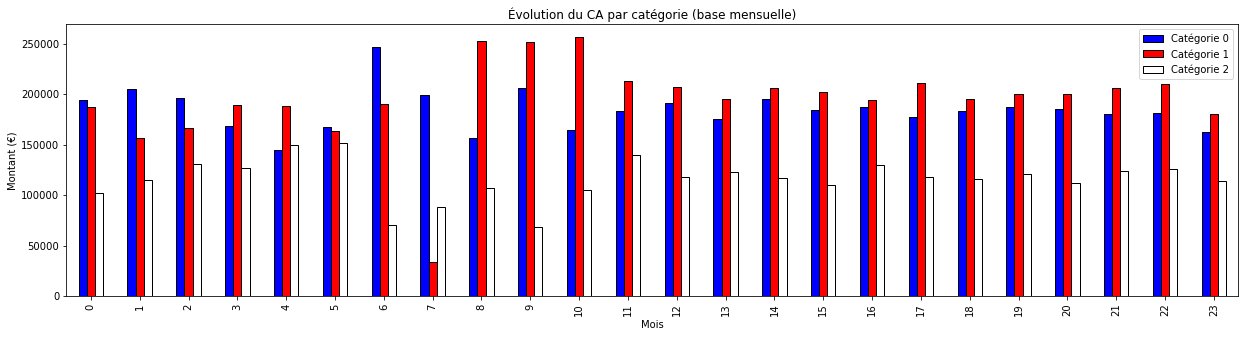

In [38]:
# Graphique CA par catégorie (mensuel)
colors = ['blue','red','white']
Cat_ag[["Catégorie 0 (CA)", "Catégorie 1 (CA)", "Catégorie 2 (CA)"]].plot.bar(figsize=(21,5),color=colors, edgecolor = "black", linewidth = 1)
plt.legend(["Catégorie 0", "Catégorie 1", "Catégorie 2"])
plt.xlabel("Mois")
plt.ylabel("Montant (€)")
plt.title("Évolution du CA par catégorie (base mensuelle)")


Text(0.5, 1.0, 'Évolution du nombre de transactions par catégorie (base mensuelle)')

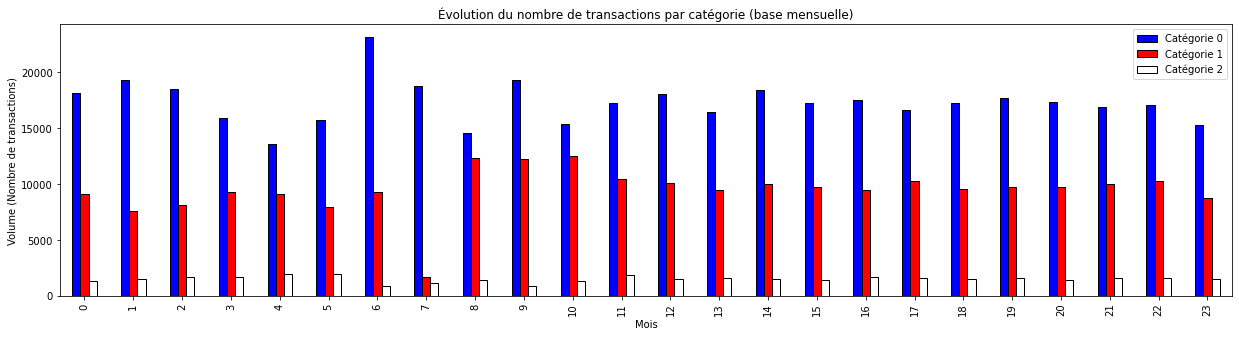

In [39]:
#Graphique en nombre de ventes (transactions) soit le volume des ventes
Cat_ag[["Volume Catégorie 0", "Volume Catégorie 1", "Volume Catégorie 2"]].plot.bar(figsize=(21,5), color=colors, edgecolor = "black", linewidth = 1)
plt.legend(["Catégorie 0", "Catégorie 1", "Catégorie 2"])
plt.xlabel("Mois")
plt.ylabel("Volume (Nombre de transactions)")
plt.title("Évolution du nombre de transactions par catégorie (base mensuelle)")

On voit bien que ce sont les livres de catégorie 1 qui ont été beaucoup moins vendus par rapport aux autre mois.

In [40]:
#Faisons un group by Day en ne gardant que l'année 2021 et le mois d'Octobre
#On ne garde que les données de l'année 2021 et du mois d'Octobre
Octobre = products_transactions[(products_transactions['Année'] == 2021) & (products_transactions['Mois'] == 10 )]
#On ne garde que les colonnes utiles
Octobre = Octobre[['Jour', 'price', 'categ']]
#On fais un group by Jour/catégorie en utilisant les fonctions d'agrégation sur price
Octobre = Octobre.groupby(["Jour","categ"]).agg({"price":["sum","count"]}).reset_index()
#On ne garde que les colonnes utiles
Octobre.columns = ["Jour", "categ", "CA", "Volume"]
#On fait un tableau croisé dynamique de Octobre
Octobre = pd.pivot_table(Octobre, columns=["categ"], index=["Jour"]).reset_index()
#On renomme les colonnes utiles
Octobre.columns = ["Jour", 'CA 0', 'CA 1', 'CA 2', 'Volume 0', 'Volume 1', 'Volume 2']
Octobre.head(31)

,Jour,CA 0,CA 1,CA 2,Volume 0,Volume 1,Volume 2
0,1,6950.500000,7003.79,3104.05,663.0,344.0,38.0
1,2,7141.010000,NaN,2041.12,661.0,NaN,28.0
2,3,6786.570000,NaN,2206.48,648.0,NaN,31.0
3,4,6554.876376,NaN,2746.08,603.0,NaN,38.0
4,5,6357.910000,NaN,3032.55,594.0,NaN,38.0
5,6,7546.580000,NaN,1944.11,702.0,NaN,26.0
6,7,6404.010000,NaN,1787.07,597.0,NaN,26.0
7,8,7069.530000,NaN,3137.82,669.0,NaN,44.0
8,9,6808.690000,NaN,2616.67,640.0,NaN,35.0
9,10,6490.980000,NaN,2334.67,600.0,NaN,29.0


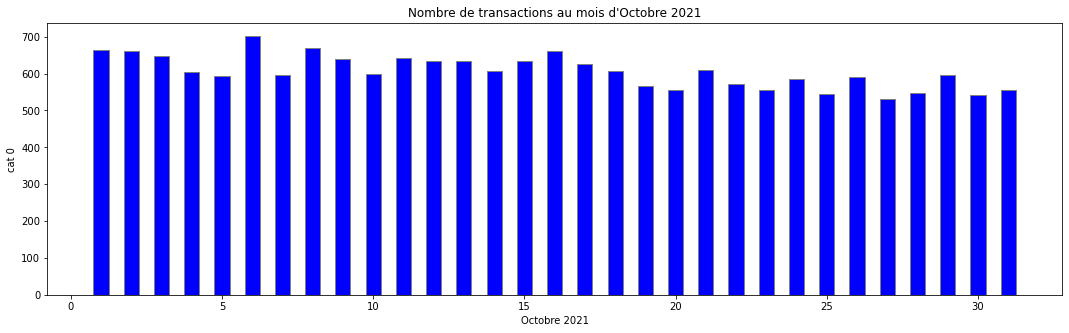

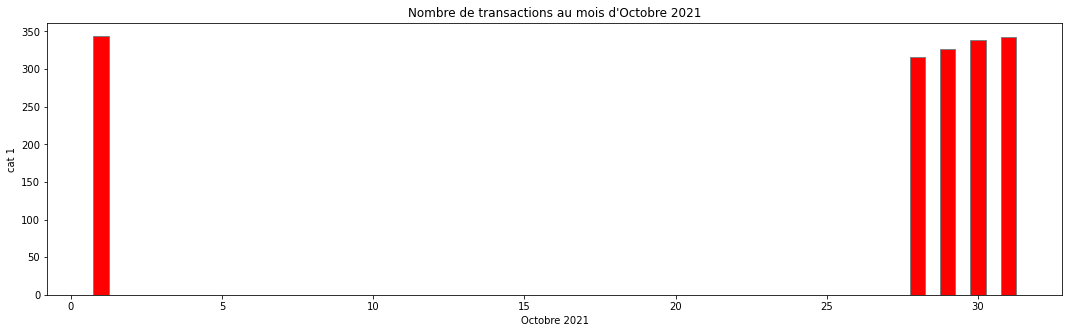

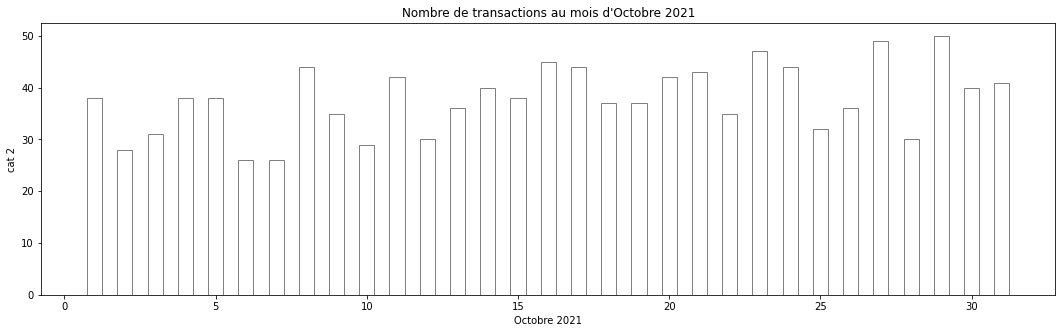

In [41]:
#Représentons cela graphiquement
color=colors
for i, cat in enumerate([0,1,2]):
    plt.figure(figsize=(40,5))
    plt.subplot(1,2,2)
    plt.bar(Octobre["Jour"], Octobre[f'Volume {cat}'], width=0.5, color=color[i],edgecolor = "grey", linewidth = 1)
    plt.xlabel("Octobre 2021")
    plt.ylabel(f'cat {cat}')
    plt.title("Nombre de transactions au mois d'Octobre 2021")
    plt.show()

On voit qu'il n'y a aucun livre de catégorie 1 qui s'est vendu entre le 1er et 28 Octobre (exclus).

#### Correction de l'anomalie du CA <a class="anchor" id="section_2_2_3"></a>

In [42]:
#Reprenons le DataFrame products_transactions et affichons le jour de la semaine concernée
products_transactions["Jour Semaine"] = products_transactions["date"].dt.dayofweek
products_transactions.head(30)

,id_prod,price,categ,date,session_id,client_id,Année,Mois,Jour,Jour Semaine
0,0_1518,4.18,0.0,2022-05-20 13:21:29.043970,s_211425,c_103,2022,5,20,4
1,1_251,15.99,1.0,2022-02-02 07:55:19.149409,s_158752,c_8534,2022,2,2,2
2,0_1277,7.99,0.0,2022-06-18 15:44:33.155329,s_225667,c_6714,2022,6,18,5
3,2_209,69.99,2.0,2021-06-24 04:19:29.835891,s_52962,c_6941,2021,6,24,3
4,0_1509,4.99,0.0,2023-01-11 08:22:08.194479,s_325227,c_4232,2023,1,11,2
5,0_1418,8.57,0.0,2022-10-20 15:59:16.084030,s_285425,c_1478,2022,10,20,3
6,0_1475,11.99,0.0,2022-06-03 04:45:09.871601,s_218033,c_7782,2022,6,3,4
7,0_2110,7.04,0.0,2021-06-26 14:48:55.311418,s_54122,c_7456,2021,6,26,5
8,0_1156,12.79,0.0,2022-12-27 12:27:40.641366,s_318058,c_7363,2022,12,27,1
9,1_299,13.99,1.0,2021-11-29 15:54:25.880121,s_126880,c_1847,2021,11,29,0


In [43]:
#Recherchons la saisonnalité de ventes hebdomadaires pour la catégorie 1 en Septembre
#On ne garde que les données de Septembre 2021 pour la catégorie 1
Septembre = products_transactions[(products_transactions['Année'] == 2021) & (products_transactions['Mois'] == 9) & (products_transactions['categ']== 1)]
#On ne garde que les colonnes utiles
Septembre = Septembre[['Jour Semaine', 'price', 'categ']]
#On fait un group by Jour de la semaine et categ en utilisant les fonctions d'agrégation
Septembre = Septembre.groupby(["Jour Semaine","categ"]).agg({"price":["sum","count"]}).reset_index()
#On ne garde que les colonnes utiles
Septembre.columns = ["Jour Semaine", "categ", "CA", "Volume"]
#On fait un tableau croisé dynamique
Septembre = pd.pivot_table(Septembre, columns=["categ"], index=["Jour Semaine"]).reset_index()
#On renomme les colonnes
Septembre.columns = ["Jour Semaine",'CA 1 S','Volume 1 S']
Septembre.head(7)

,Jour Semaine,CA 1 S,Volume 1 S
0,0,26984.99,1299
1,1,23817.06,1167
2,2,32574.81,1569
3,3,33260.68,1628
4,4,24513.88,1196
5,5,24654.80,1215
6,6,24807.56,1194


In [44]:
#Recherchons la saisonnalité de ventes hebdomadaires pour la catégorie 1 en Octobre
Octobre_js = products_transactions[(products_transactions['Année'] == 2021) & (products_transactions['Mois'] == 10) & (products_transactions['categ']== 1)]
Octobre_js = Octobre_js[['Jour Semaine', 'price', 'categ']]
Octobre_js = Octobre_js.groupby(["Jour Semaine","categ"]).agg({"price":["sum","count"]}).reset_index()
Octobre_js.columns = ["Jour Semaine", "categ", "CA", "Volume"]
Octobre_js = pd.pivot_table(Octobre_js, columns=["categ"], index=["Jour Semaine"]).reset_index()
Octobre_js.columns = ["Jour Semaine",'CA 1 O','Volume 1 O']
Octobre_js.head(7)

,Jour Semaine,CA 1 O,Volume 1 O
0,3,6317.99,316
1,4,13428.97,670
2,5,6753.69,338
3,6,7261.67,342


In [45]:
#Recherchons la saisonnalité de ventes hebdomadaires pour la catégorie 1 en Novembre
Novembre = products_transactions[(products_transactions['Année'] == 2021) & (products_transactions['Mois'] == 11) & (products_transactions['categ']== 1)]
Novembre = Novembre[['Jour Semaine', 'price', 'categ']]
Novembre = Novembre.groupby(["Jour Semaine","categ"]).agg({"price":["sum","count"]}).reset_index()
Novembre.columns = ["Jour Semaine", "categ", "CA", "Volume"]
Novembre = pd.pivot_table(Novembre, columns=["categ"], index=["Jour Semaine"]).reset_index()
Novembre.columns = ["Jour Semaine",'CA 1 N','Volume 1 N']
Novembre.head(7)

,Jour Semaine,CA 1 N,Volume 1 N
0,0,41738.72,2018
1,1,43214.02,2088
2,2,33714.08,1642
3,3,33699.01,1642
4,4,33278.32,1642
5,5,33749.44,1641
6,6,33516.80,1643


In [46]:
#Faisons maintenant une jointure entre Septembre, Octobre et Novembre pour avoir une saisonnalité estimée en Octobre 2021
#On fait une jointure left et non right vu que Octobre_js contient des jours pour lesquelles il n'y a pas de données
sept_oct = pd.merge(Septembre, Octobre_js, on='Jour Semaine', how='left')
#On fait une jointure outer pour garder un maximum de données
sept_oct_nov = pd.merge(sept_oct, Novembre, on='Jour Semaine', how='outer')
#On fait la moyenne des CA et des volumes les lisser et estimer leurs valeurs sur le mois d'octobre
sept_oct_nov['CA 1 Octobre'] = (sept_oct_nov['CA 1 S'] + sept_oct_nov['CA 1 N'])/2
sept_oct_nov['Volume 1 Octobre'] = (sept_oct_nov['Volume 1 S'] + sept_oct_nov['Volume 1 N'])/2
#On renomme les colonnes utiles
sept_oct_nov = sept_oct_nov[['Jour Semaine', 'CA 1 Octobre', 'Volume 1 Octobre']]
sept_oct_nov.head(7)


,Jour Semaine,CA 1 Octobre,Volume 1 Octobre
0,0,34361.855,1658.5
1,1,33515.540,1627.5
2,2,33144.445,1605.5
3,3,33479.845,1635.0
4,4,28896.100,1419.0
5,5,29202.120,1428.0
6,6,29162.180,1418.5


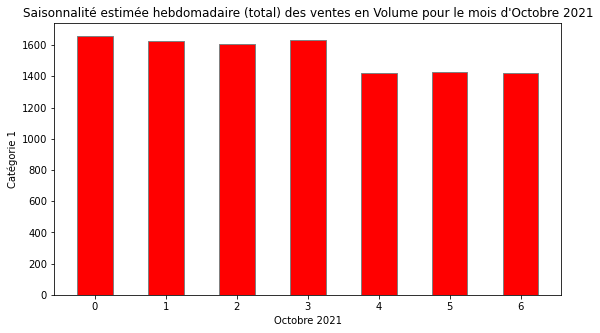

In [47]:
#Représentons cela graphiquement pour le volume
color=['red']
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.bar(sept_oct_nov["Jour Semaine"], sept_oct_nov["Volume 1 Octobre"], width=0.5, color=color,edgecolor = "grey", linewidth = 1)
plt.xlabel("Octobre 2021")
plt.ylabel("Catégorie 1")
plt.title("Saisonnalité estimée hebdomadaire (total) des ventes en Volume pour le mois d'Octobre 2021")
plt.show()

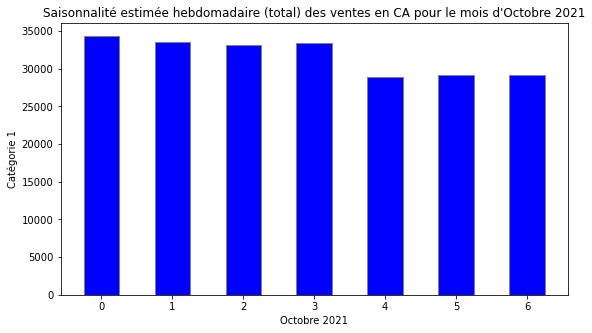

In [48]:
#Représentons cela graphiquement pour le CA
color=['blue']
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.bar(sept_oct_nov["Jour Semaine"], sept_oct_nov["CA 1 Octobre"], width=0.5, color=color,edgecolor = "grey", linewidth = 1)
plt.xlabel("Octobre 2021")
plt.ylabel("Catégorie 1")
plt.title("Saisonnalité estimée hebdomadaire (total) des ventes en CA pour le mois d'Octobre 2021")
plt.show()

In [49]:
#Prenons maintenant le CA estimée total et le CA original pour la catégorie 1 et soustrayons pour avoir la différence à ajouter
# au CA original
#Créons une variable dans laquelle on stocke le CA original pour la catégorie 1
CA1_Original = Octobre_js["CA 1 O"].sum()
#Créons une variable dans laquelle on stocke le CA estimé pour la catégorie 1
CA1_estimée_total = sept_oct_nov["CA 1 Octobre"].sum()
#Faisons la différence des 2 pour avoir le CA manquant pour la catégorie 1
CA1_final = CA1_estimée_total - CA1_Original
print("La différence de Chiffre d'Affaires manquante est de", round(CA1_final,2), "€.")

La différence de Chiffre d'Affaires manquante est de 187999.76 €.


In [50]:
#Reprenons le Df du CA 
products_transactions_mois.head(40)

,date,Ventes_en_Keuros,Moyenne Mobile trimestrielle
0,2021-03-31,482.536354,NaN
1,2021-04-30,476.258235,NaN
2,2021-05-31,493.028576,483.941055
3,2021-06-30,484.163027,484.483279
4,2021-07-31,482.877953,486.689852
5,2021-08-31,482.380534,483.140505
6,2021-09-30,507.368338,490.875608
7,2021-10-31,320.873207,436.874026
8,2021-11-30,516.274112,448.171886
9,2021-12-31,525.991747,454.379689


In [51]:
#Faisons une extraction de données à l'aide de variables pour extraire l'ancien CA et l'additionner avec la différence
CA1_old=products_transactions_mois.iloc[7]['Ventes_en_Keuros']
#On n'oublie pas de convertir en milliers la différence de CA
CA1_new= CA1_old + (CA1_final/1000) 
print("Le Chiffre d'Affaires estimé est de", round(CA1_new, 2), "en K€ pour le mois d'Octobre 2021.")

Le Chiffre d'Affaires estimé est de 508.87 en K€ pour le mois d'Octobre 2021.


In [52]:
#Faisons une réinjection dans ce DataFrame de la nouvelle variable
products_transactions_mois['Ventes_en_Keuros']=products_transactions_mois['Ventes_en_Keuros'].replace([CA1_old],[CA1_new])
#On ne garde que les colonnes utiles
products_transactions_mois = products_transactions_mois[['date', 'Ventes_en_Keuros']]
#On recalcule la moyenne mobile trimestrielle
products_transactions_mois['Moyenne Mobile trimestrielle'] = products_transactions_mois.Ventes_en_Keuros.rolling(3).mean()

products_transactions_mois.head(40)

,date,Ventes_en_Keuros,Moyenne Mobile trimestrielle
0,2021-03-31,482.536354,NaN
1,2021-04-30,476.258235,NaN
2,2021-05-31,493.028576,483.941055
3,2021-06-30,484.163027,484.483279
4,2021-07-31,482.877953,486.689852
5,2021-08-31,482.380534,483.140505
6,2021-09-30,507.368338,490.875608
7,2021-10-31,508.872972,499.540615
8,2021-11-30,516.274112,510.838474
9,2021-12-31,525.991747,517.046277


In [53]:
CA_total = products_transactions_mois["Ventes_en_Keuros"].sum()*1000
print("Le CA total sur 24 mois est de ", round(CA_total,2), "€.")

Le CA total sur 24 mois est de  12044079.48 €.


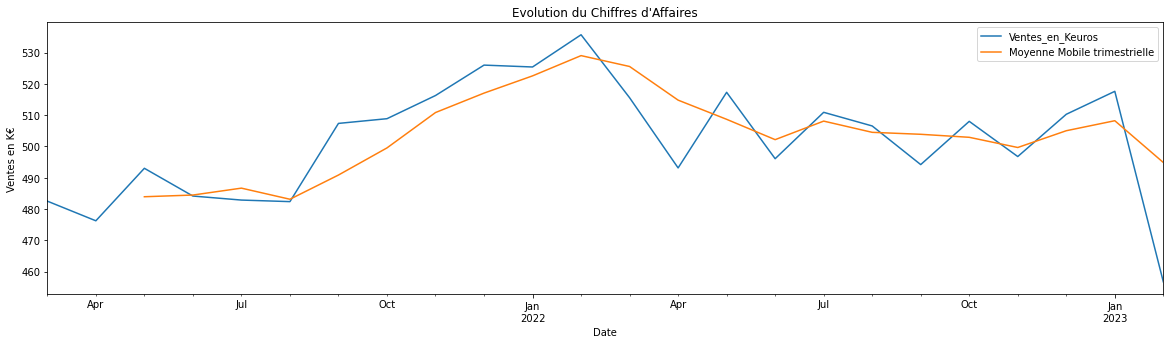

In [54]:
#On crée un graphique avec l'évolution du CA corrigé

fig, ax = plt.subplots(figsize=(20, 5))
products_transactions_mois.plot(x='date', y='Ventes_en_Keuros', ax=ax)
products_transactions_mois.plot(x='date', y='Moyenne Mobile trimestrielle', ax=ax)
plt.title("Evolution du Chiffres d'Affaires")
plt.xlabel('Date')
plt.ylabel('Ventes en K€')

plt.show()

#### Visualisation des tops et flops produits par CA et nombre de ventes <a class="anchor" id="section_2_3"></a>

#### Préparation du DataFrame préalable au top et flop <a class="anchor" id="section_2_3_1"></a>

In [55]:
#On fait un group by pour additionner tous les prix par transactions vu que chaque transaction a un prix et correspond à un
# produit et que additionner toutes les transactions liées à un produit revient à calculer le CA par produit
products_transactions2_top_flop = products_transactions.groupby(['id_prod'], as_index = False)
products_transactions2_top_flop = products_transactions2_top_flop.sum()

products_transactions2_top_flop.head()

,id_prod,price,categ,Année,Mois,Jour,Jour Semaine
0,0_0,4657.50,0.0,2510896,8225,19733,3742
1,0_1,5352.13,0.0,984544,3127,7738,1461
2,0_10,394.90,0.0,44475,151,269,73
3,0_100,61.80,0.0,6065,21,29,13
4,0_1000,2954.88,0.0,873352,2778,6281,1254


#### Visualisation du top produit <a class="anchor" id="section_2_3_2"></a>

In [56]:
# On fait un top 20 des produits vendus
products_transactions2_top_flop_desc = products_transactions2_top_flop.sort_values(by = 'price', ascending = False)
# On ne garde que la colonne price
products_transactions2_top_flop_desc = products_transactions2_top_flop_desc[['id_prod','price']]
# On renomme la colonne price en CA par produit
products_transactions2_top_flop_desc.rename(columns={"price":"CA par produit (Top 20)"}, inplace=True)
# On va chercher le prix du produit en question dans le DF précédemment créée grâce à une jointure
products_transactions2_top_flop_desc_prix = pd.merge(products_transactions2_top_flop_desc, products_transactions, on='id_prod', how='inner')
products_transactions2_top_flop_desc_prix = products_transactions2_top_flop_desc_prix[['id_prod','CA par produit (Top 20)', 'price']]
# Il ne nous reste plus qu'à diviser le CA par produit par le prix pour trouver le nombre de ventes
products_transactions2_top_flop_desc_prix['Nombre de ventes'] = products_transactions2_top_flop_desc_prix['CA par produit (Top 20)']/products_transactions2_top_flop_desc_prix['price']
products_transactions2_top_flop_desc_prix = products_transactions2_top_flop_desc_prix.groupby(['id_prod'], as_index = False)
products_transactions2_top_flop_desc_prix = products_transactions2_top_flop_desc_prix.mean()
products_transactions2_top_flop_desc_prix = products_transactions2_top_flop_desc_prix.sort_values(by = 'CA par produit (Top 20)', ascending = False)
products_transactions2_top_flop_desc_prix.head(20)

,id_prod,CA par produit (Top 20),price,Nombre de ventes
3097,2_159,94893.50,145.99,650.0
3071,2_135,69334.95,68.99,1005.0
3046,2_112,65407.76,67.57,968.0
3035,2_102,60736.78,59.14,1027.0
3153,2_209,56971.86,69.99,814.0
2620,1_395,54356.25,28.99,1875.0
2592,1_369,54025.48,23.99,2252.0
3044,2_110,53846.25,62.25,865.0
3202,2_39,53060.85,57.99,915.0
3105,2_166,52449.12,230.04,228.0


In [57]:
products_transactions2_top_flop_desc_sales = products_transactions2_top_flop_desc_prix.sort_values(by = 'Nombre de ventes', ascending = False)
products_transactions2_top_flop_desc_sales.head(20)

,id_prod,CA par produit (Top 20),price,Nombre de ventes
2592,1_369,54025.48,23.99,2252.0
2645,1_417,45947.11,20.99,2189.0
2642,1_414,51949.40,23.83,2180.0
2734,1_498,49731.36,23.37,2128.0
2654,1_425,35611.04,16.99,2096.0
2630,1_403,35260.40,17.99,1960.0
2640,1_412,32484.15,16.65,1951.0
2641,1_413,34990.55,17.99,1945.0
2633,1_406,48106.59,24.81,1939.0
2634,1_407,30940.65,15.99,1935.0


#### Visualisation du flop produit <a class="anchor" id="section_2_3_3"></a>

In [58]:
#On fait un flop 20 des produits vendus
products_transactions2_top_flop_asc = products_transactions2_top_flop.sort_values(by = 'price', ascending = True)
#On ne garde que la colonne price
products_transactions2_top_flop_asc = products_transactions2_top_flop_asc[['id_prod', 'price']]
#On renomme la colonne price en CA par produit
products_transactions2_top_flop_asc.rename(columns={"price":"CA par produit (Flop 20)"}, inplace=True)
# On va chercher le prix du produit en question dans le DF précédemment créée grâce à une jointure
products_transactions2_top_flop_asc_prix = pd.merge(products_transactions2_top_flop_asc, products_transactions, on='id_prod', how='inner')
products_transactions2_top_flop_asc_prix = products_transactions2_top_flop_asc_prix[['id_prod','CA par produit (Flop 20)', 'price']]
# Il ne nous reste plus qu'à diviser le CA par produit par le prix pour trouver le nombre de ventes
products_transactions2_top_flop_asc_prix['Nombre de ventes'] = products_transactions2_top_flop_asc_prix['CA par produit (Flop 20)']/products_transactions2_top_flop_asc_prix['price']
products_transactions2_top_flop_asc_prix = products_transactions2_top_flop_asc_prix.groupby(['id_prod'], as_index = False)
products_transactions2_top_flop_asc_prix = products_transactions2_top_flop_asc_prix.mean()
products_transactions2_top_flop_asc_prix = products_transactions2_top_flop_asc_prix.sort_values(by = 'CA par produit (Flop 20)', ascending = True)
products_transactions2_top_flop_asc_prix.head(20)

,id_prod,CA par produit (Flop 20),price,Nombre de ventes
595,0_1539,0.99,0.99,1.0
313,0_1284,1.38,1.38,1.0
719,0_1653,1.98,0.99,2.0
1785,0_541,1.99,1.99,1.0
2080,0_807,1.99,1.99,1.0
665,0_1601,1.99,1.99,1.0
802,0_1728,2.27,2.27,1.0
549,0_1498,2.48,2.48,1.0
2180,0_898,2.54,1.27,2.0
925,0_1840,2.56,1.28,2.0


In [59]:
products_transactions2_top_flop_asc_sales = products_transactions2_top_flop_asc_prix.sort_values(by = 'Nombre de ventes', ascending = True)
products_transactions2_top_flop_asc_sales.head(20)

,id_prod,CA par produit (Flop 20),price,Nombre de ventes
595,0_1539,0.99,0.99,1.0
3248,2_81,86.99,86.99,1.0
1327,0_2201,20.99,20.99,1.0
3176,2_23,115.99,115.99,1.0
698,0_1633,24.99,24.99,1.0
2167,0_886,21.82,21.82,1.0
166,0_1151,2.99,2.99,1.0
1793,0_549,2.99,2.99,1.0
2109,0_833,2.99,2.99,1.0
752,0_1683,2.99,2.99,1.0


#### Répartition du CA par produit et par catégorie <a class="anchor" id="section_2_4"></a> 

#### Courbe de Lorenz de répartition du CA par produit <a class="anchor" id="section_2_4_1"></a> 

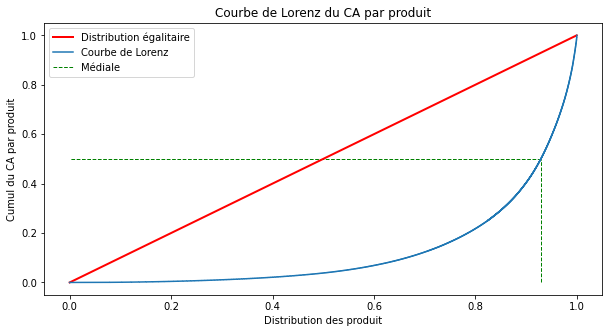

In [60]:
#Faisons maintenant une courbe de Lorenz pour afficher la répartition du CA par produit
CA_prod = products_transactions2_top_flop_desc_prix['CA par produit (Top 20)'].values
n = len(CA_prod)
lorenz = np.cumsum(np.sort(CA_prod)) / CA_prod.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

xaxis = np.linspace(0-1/n,1+1/n,n+1) 
#Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. 
# Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.figure(figsize = (10,5))
plt.plot([0, 1], [0, 1], 'r-', lw=2, label='Distribution égalitaire')
plt.vlines(x=.93, ymin=0, ymax=.5, color='green', linestyle='--', linewidth=1, label='Médiale')
plt.hlines(xmin=.93, xmax=0, y=.5, color='green', linestyle='--', linewidth=1)
plt.plot(xaxis,lorenz,drawstyle='steps-post', label='Courbe de Lorenz')
plt.ylabel("Cumul du CA par produit")
plt.xlabel("Distribution des produit")
plt.title("Courbe de Lorenz du CA par produit")
plt.legend(loc="best")
plt.show()

On voit que 50% du CA cumulé représente 93% de la distribution des produits. On peut aussi dire que 7% des produits concentrent à eux seuls 50% du CA cumulé.

#### Indice de Gini de répartition du CA par produit <a class="anchor" id="section_2_4_2"></a> 

In [61]:
#Calculons maintenant l'indice de Gini pour voir si la répartition est égalitaire ou pas
#Spoiler : elle ne l'est pas d'après la forme de la courbe de Lorenz.
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
print("L'indice de Gini est de :", round(gini,2),".")

L'indice de Gini est de : 0.74 .


L'indice de Gini est proche de 1, la contribution au CA global pour chaque référence est donc très inégale en fonction des
produits.

#### Courbe de Pareto du CA par produit et Répartition par catégorie <a class="anchor" id="section_2_4_3"></a>

#### Courbe de Pareto du CA par produit

In [62]:
#Créons maintenant une sous-catégorie pour les produits pour pouvoir les mettre sous la forme d'une courbe de Pareto
products_transactions_pareto = products_transactions.groupby(['id_prod'], as_index = False)
products_transactions_pareto = products_transactions_pareto.sum()

products_transactions_pareto['sous_categ'] = products_transactions_pareto.id_prod.str.slice(0, 3)
products_transactions_pareto = products_transactions_pareto.groupby(['sous_categ'], as_index = False)
products_transactions_pareto = products_transactions_pareto.sum()
products_transactions_pareto.rename(columns={"price":"CA par sous-catégorie"}, inplace=True)
products_transactions_pareto = products_transactions_pareto[['sous_categ','CA par sous-catégorie']]
products_transactions_pareto = products_transactions_pareto.sort_values(by = 'CA par sous-catégorie', ascending = False)
products_transactions_pareto.head(29)

,sous_categ,CA par sous-catégorie
1,0_1,3.641842e+06
20,2_1,1.755545e+06
12,1_3,1.239012e+06
13,1_4,1.223984e+06
11,1_2,7.275479e+05
15,1_6,5.643442e+05
21,2_2,5.394592e+05
2,0_2,4.989633e+05
14,1_5,4.308685e+05
16,1_7,2.064568e+05


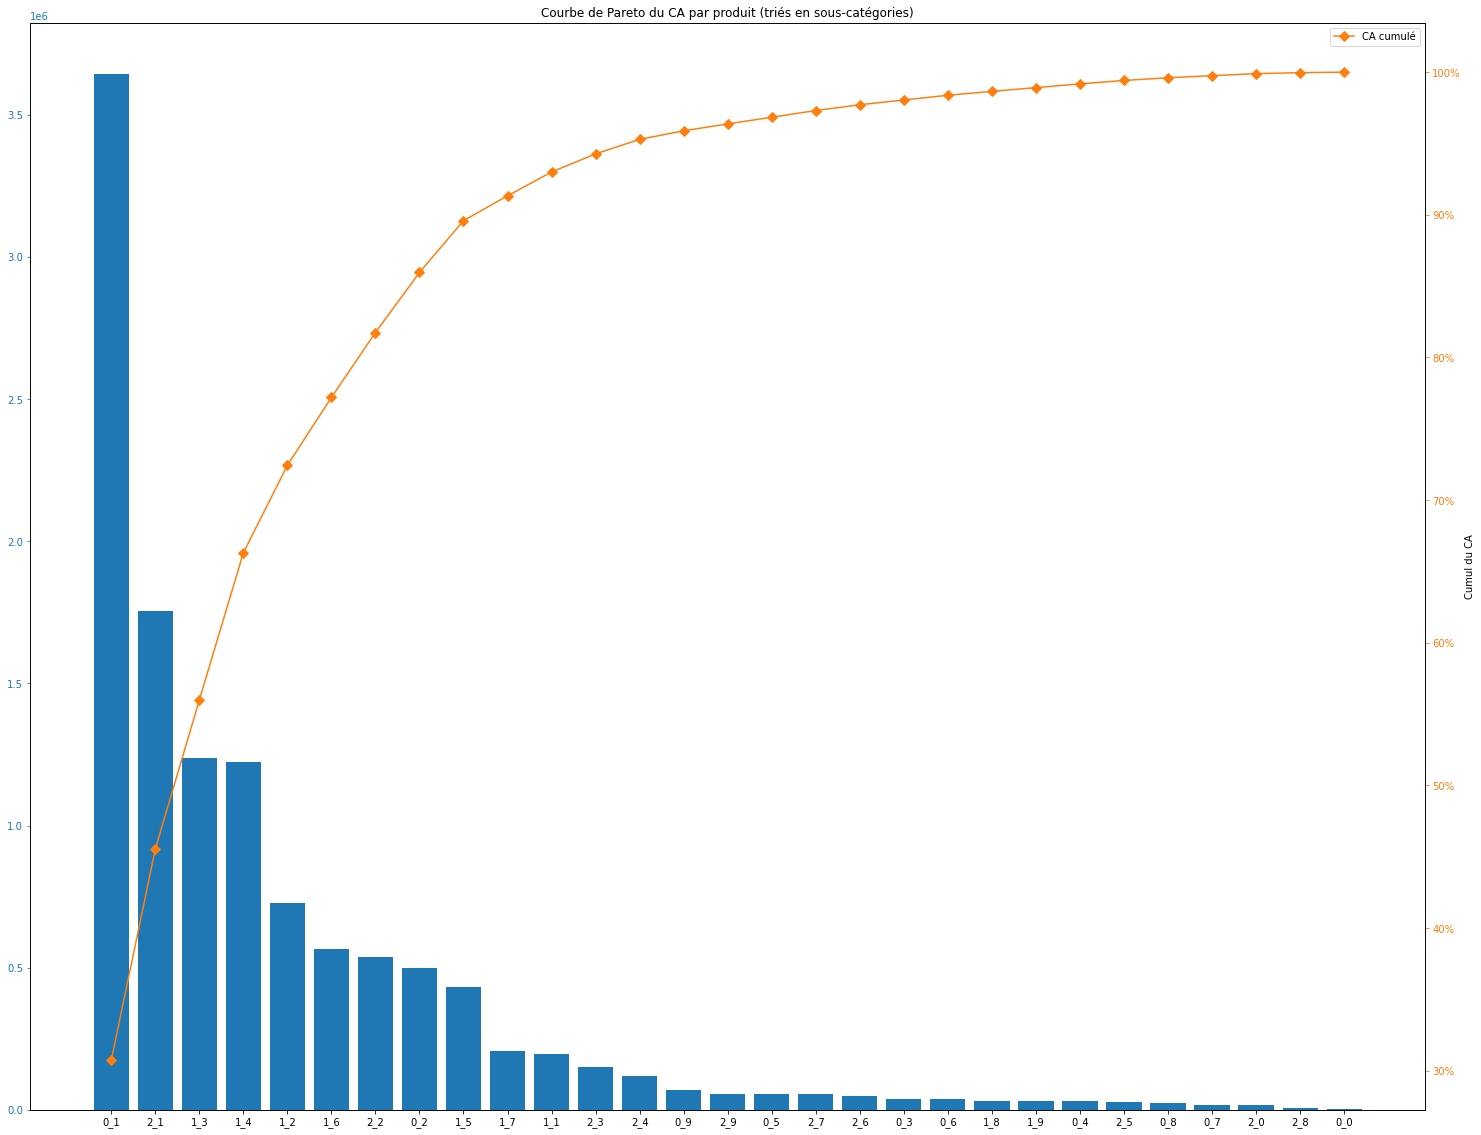

In [63]:
#Faisons maintenant une courbe (diagramme) de Pareto pour vérifier la loi de 80-20

from matplotlib.ticker import PercentFormatter

products_transactions_pareto["cumpercentage"] = products_transactions_pareto['CA par sous-catégorie'].cumsum()/products_transactions_pareto['CA par sous-catégorie'].sum()*100

fig, ax = plt.subplots(figsize=(25, 20))
ax.bar(products_transactions_pareto['sous_categ'], products_transactions_pareto['CA par sous-catégorie'], color="C0", label="CA par sous-référence")
ax2 = ax.twinx()
ax2.plot(products_transactions_pareto['sous_categ'], products_transactions_pareto["cumpercentage"], color="C1", marker="D", ms=7, label="CA cumulé")
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.ylabel("Cumul du CA")
plt.xlabel("Références (Sous-catégories) des produits")
plt.title("Courbe de Pareto du CA par produit (triés en sous-catégories)")
plt.legend(loc="best")
plt.show()



In [64]:
#Comptons maintenant le nombre de produits par référence pour vérifier la loi de Pareto
products_transactions_pareto2 = products_transactions.groupby(['id_prod'], as_index = False)
products_transactions_pareto2 = products_transactions_pareto2.sum()

products_transactions_pareto2['sous_categ'] = products_transactions_pareto2.id_prod.str.slice(0, 3)
products_transactions_pareto2 = products_transactions_pareto2.groupby(['sous_categ'], as_index = False)
products_transactions_pareto2 = products_transactions_pareto2.count()
products_transactions_pareto2 = products_transactions_pareto2[['sous_categ','id_prod']]
products_transactions_pareto2.head(29)

,sous_categ,id_prod
0,0_0,1
1,0_1,1100
2,0_2,418
3,0_3,109
4,0_4,111
5,0_5,110
6,0_6,111
7,0_7,111
8,0_8,111
9,0_9,111


On voit que les 7 premières sous-références concentrent à elles seules environ 80% du CA voyons voir
si elles représentent 20% des références. 

In [65]:
nombre_ref = products_transactions_pareto2.loc[0 : 6,["id_prod"]].sum()
nombre_ref = nombre_ref.sum()
nombre_ref_total = products_transactions_pareto2['id_prod'].sum()
pourcentage = nombre_ref/nombre_ref_total*100
print("Le pourcentage est de", round(pourcentage,2), "%.")

Le pourcentage est de 60.01 %.


La loi de Pareto n'est pas vérifié en termes de références mais en termes de sous-références si car il y a 7 sous-références sur les 29 qui contribuent à environ 80% du CA ce qui correspond à 25% des sous-références (proche de 20%).

#### Répartition par catégorie

In [66]:
#Calculons maintenant le CA par catégorie en reprenant le DF products_transactions
products_transactions_ca_categ = products_transactions.groupby(['categ'], as_index = False)
products_transactions_ca_categ = products_transactions_ca_categ.sum()
# On ne garde que les colonnes categ et price
products_transactions_ca_categ = products_transactions_ca_categ[['categ','price']]
products_transactions_ca_categ.head(3)


,categ,price
0,0.0,4.422082e+06
1,1.0,4.653723e+06
2,2.0,2.780275e+06


<AxesSubplot:title={'center':'Répartition du CA par catégorie'}, ylabel='price'>

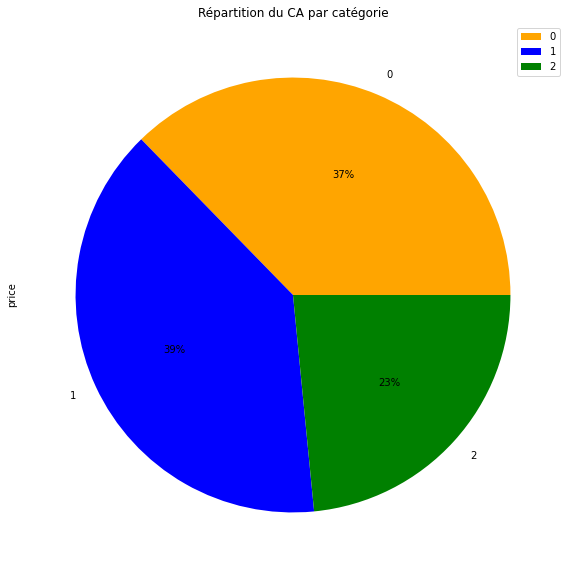

In [67]:
#Traçons maintenant le pie chart pour illustrer cela
products_transactions_ca_categ.groupby(['categ']).sum().plot(kind='pie', y='price', figsize=(10, 10), labels=["0","1","2"], autopct='%1.0f%%',
                                colors = ['orange', 'blue', 'green'],
                                title='Répartition du CA par catégorie')

In [68]:
#Trouvons maintenant le prix moyen d'un livre selon sa catégorie 
products_transactions_prix_moyen_cat = products_transactions.groupby(['categ'], as_index = False)
products_transactions_prix_moyen_cat = products_transactions_prix_moyen_cat.mean()
# On ne garde que les colonnes categ et price
products_transactions_prix_moyen_cat = products_transactions_prix_moyen_cat[['categ','price']]
products_transactions_prix_moyen_cat.head(3)

,categ,price
0,0.0,10.638188
1,1.0,20.485730
2,2.0,76.207412


On remarque les livres les plus vendus sont ceux ayant le prix intermédiaire moyen à savoir ceux de catégorie 1.

#### Analyse des profils des clients <a class="anchor" id="section_2_5"></a>

#### Jointure de products_transactions, customers et âge des clients <a class="anchor" id="section_2_5_1"></a>


In [69]:
#Faisons la jointure pour rechercher des informations sur les profils clients
products_transactions_customers = pd.merge(products_transactions, customers, on='client_id')
products_transactions_customers.head()

,id_prod,price,categ,date,session_id,client_id,Année,Mois,Jour,Jour Semaine,sex,birth
0,0_1518,4.18,0.0,2022-05-20 13:21:29.043970,s_211425,c_103,2022,5,20,4,f,1986
1,0_1627,3.99,0.0,2022-06-18 05:55:31.816994,s_225494,c_103,2022,6,18,5,f,1986
2,0_1104,13.21,0.0,2023-02-08 17:31:06.898425,s_338755,c_103,2023,2,8,2,f,1986
3,0_1390,19.37,0.0,2021-04-20 06:18:39.939761,s_23078,c_103,2021,4,20,1,f,1986
4,0_1547,8.99,0.0,2022-03-15 19:54:53.904123,s_179629,c_103,2022,3,15,1,f,1986


#### Distribution de l'âge des clients

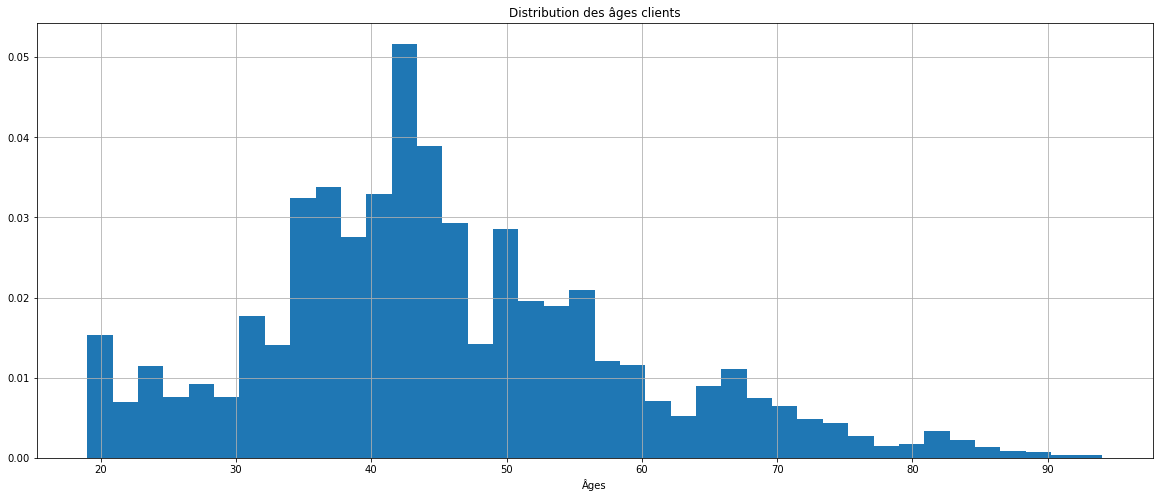

In [70]:
#Visualisons maintenant l'âge des clients en termes de distribution par le biais d'un histogramme
#On ajoute une colonne âge
products_transactions_customers['Âge']= 2023 - products_transactions_customers.birth

plt.figure(figsize=(20,8))
products_transactions_customers['Âge'].hist(density=True, alpha=1, bins=40)

plt.xlabel('Âges')
plt.title('Distribution des âges clients')
plt.show()


On voit que la majeure partie des clients se concentrent entre 35 et 50 ans.

In [71]:
#Faisons maintenant une colonne sur la tranche d'âge pour déterminer par la suite en faisant un group by combien il y a de 
#clients par tranche d'âge

products_transactions_customers['tranche_age'] = '18-30'
products_transactions_customers['tranche_age'].loc[products_transactions_customers[products_transactions_customers['Âge']>=30].index] = '30-40'
products_transactions_customers['tranche_age'].loc[products_transactions_customers[products_transactions_customers['Âge']>=40].index] = '40-50'
products_transactions_customers['tranche_age'].loc[products_transactions_customers[products_transactions_customers['Âge']>=50].index] = '50-60'
products_transactions_customers['tranche_age'].loc[products_transactions_customers[products_transactions_customers['Âge']>=60].index] = '60-70'
products_transactions_customers['tranche_age'].loc[products_transactions_customers[products_transactions_customers['Âge']>=70].index] = '70-80'
products_transactions_customers['tranche_age'].loc[products_transactions_customers[products_transactions_customers['Âge']>=80].index] = '80 et +'
products_transactions_customers.head()


C:\Users\nic_9\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,id_prod,price,categ,date,session_id,client_id,Année,Mois,Jour,Jour Semaine,sex,birth,Âge,tranche_age
0,0_1518,4.18,0.0,2022-05-20 13:21:29.043970,s_211425,c_103,2022,5,20,4,f,1986,37,30-40
1,0_1627,3.99,0.0,2022-06-18 05:55:31.816994,s_225494,c_103,2022,6,18,5,f,1986,37,30-40
2,0_1104,13.21,0.0,2023-02-08 17:31:06.898425,s_338755,c_103,2023,2,8,2,f,1986,37,30-40
3,0_1390,19.37,0.0,2021-04-20 06:18:39.939761,s_23078,c_103,2021,4,20,1,f,1986,37,30-40
4,0_1547,8.99,0.0,2022-03-15 19:54:53.904123,s_179629,c_103,2022,3,15,1,f,1986,37,30-40


In [72]:
#Faisons maintenant comme annoncé un group by client_id puis agrégeons sur la tranche d'âge avec count
products_transactions_customers_tranche_age_nb = products_transactions_customers.groupby(['client_id', 'tranche_age'], as_index = False)
products_transactions_customers_tranche_age_nb = products_transactions_customers_tranche_age_nb.count()
products_transactions_customers_tranche_age_nb = products_transactions_customers_tranche_age_nb.groupby(['tranche_age'], as_index = False)
products_transactions_customers_tranche_age_nb = products_transactions_customers_tranche_age_nb.count()
products_transactions_customers_tranche_age_nb = products_transactions_customers_tranche_age_nb[['tranche_age','client_id']]
products_transactions_customers_tranche_age_nb.rename(columns={"client_id":"Nombre de clients"}, inplace=True)
products_transactions_customers_tranche_age_nb.head(20)


,tranche_age,Nombre de clients
0,18-30,1945
1,30-40,1619
2,40-50,1777
3,50-60,1493
4,60-70,1028
5,70-80,505
6,80 et +,233


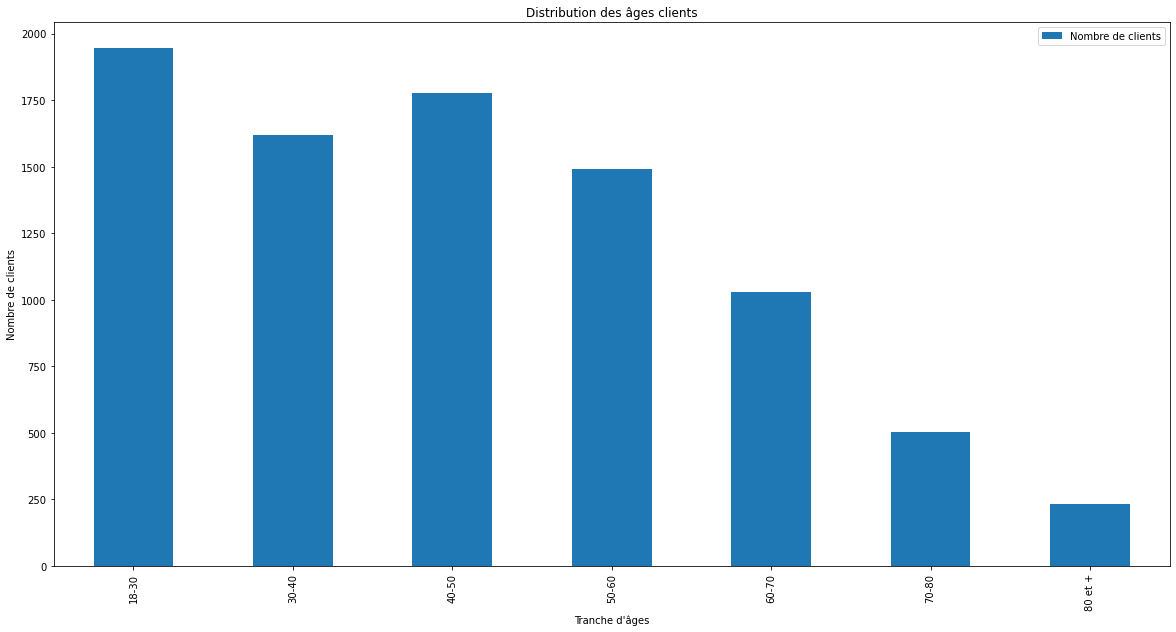

In [73]:
#Traçons maintenant le graphique sous forme d'un histogramme pour représenter cela

products_transactions_customers_tranche_age_nb.plot(x="tranche_age", y=["Nombre de clients"], kind="bar",figsize=(20, 10))
plt.ylabel("Nombre de clients")
plt.xlabel("Tranche d'âges")
plt.title('Distribution des âges clients')
plt.show()

On voit que la majorité des clients ont entre 18 et 60 ans.

#### Top et flop clients, achat moyen et panier moyen par client <a class="anchor" id="section_2_5_2"></a>

In [74]:
#On fait un group by pour additionner tous les prix par client vu que chaque transaction a un prix et correspond à un
# produit et que additionner toutes les transactions liées à un client revient à calculer le CA par client
products_transactions_customers_top_flop = products_transactions_customers.groupby(['client_id'], as_index = False)
products_transactions_customers_top_flop = products_transactions_customers_top_flop.sum()
#On ne garde que les colonnes utiles
products_transactions_customers_top_flop = products_transactions_customers_top_flop[['client_id','price']]
products_transactions_customers_top_flop.head()

,client_id,price
0,c_1,558.18
1,c_10,1353.60
2,c_100,254.85
3,c_1000,2261.89
4,c_1001,1812.86


#### Top clients

In [75]:
#On renomme la colonne price en CA par produit tout en faisant un Top 20 des clients
products_transactions_customers_top_flop_desc = products_transactions_customers_top_flop.sort_values(by = 'price', ascending = False)
products_transactions_customers_top_flop_desc.rename(columns={"price":"CA par client (Top 20)"}, inplace=True)
products_transactions_customers_top_flop_desc.head(20)

,client_id,CA par client (Top 20)
677,c_1609,324033.350000
4388,c_4958,289760.340000
6337,c_6714,153662.749128
2724,c_3454,113669.844564
2513,c_3263,5276.870000
634,c_1570,5271.620000
2108,c_2899,5214.050000
1268,c_2140,5208.820000
7006,c_7319,5155.770000
7791,c_8026,5093.218188


#### Flop clients

In [76]:
#On renomme la colonne price en CA par produit tout en faisant un Flop 20 des clients
products_transactions_customers_top_flop_asc = products_transactions_customers_top_flop.sort_values(by = 'price', ascending = True)
products_transactions_customers_top_flop_asc.rename(columns={"price":"CA par client (Flop 20)"}, inplace=True)
products_transactions_customers_top_flop_asc.head(20)

,client_id,CA par client (Flop 20)
8151,c_8351,6.31
7918,c_8140,8.30
7889,c_8114,9.98
1556,c_240,11.06
4044,c_4648,11.20
3855,c_4478,13.36
5501,c_5962,13.99
5589,c_6040,15.72
5453,c_5919,15.98
5354,c_5829,16.07


#### Achat Moyen par client et panier moyen par client

In [77]:
#Calculons et stockons maintenant dans des variables le nombre d'achats moyens par clients et le panier moyen par clients
Achat_moyen = products_transactions_customers.groupby(["client_id"])["session_id"].count().mean()
Panier_moyen = products_transactions_customers.groupby(["client_id"])["price"].sum().mean()

print("Le nombre moyen d'achat par client est de", round(Achat_moyen),".")
print("Le panier moyen par client est de", round(Panier_moyen,2), "€.")

Le nombre moyen d'achat par client est de 79 .
Le panier moyen par client est de 1378.61 €.


#### Répartition du CA entre les clients (Courbe de Lorenz) et indice de Gini <a class="anchor" id="section_2_5_3"></a>

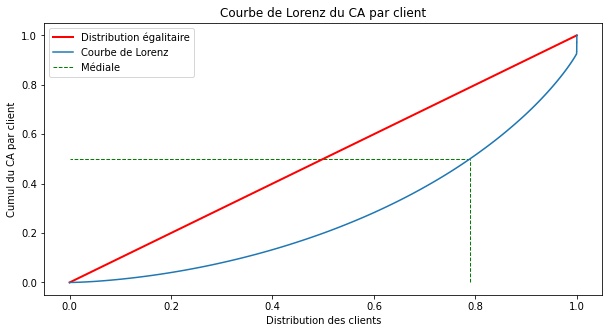

In [78]:
#Faisons maintenant une courbe de Lorenz pour afficher la répartition du CA par client
CA_client = products_transactions_customers_top_flop['price'].values
n = len(CA_client)
lorenz = np.cumsum(np.sort(CA_client)) / CA_client.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

xaxis = np.linspace(0-1/n,1+1/n,n+1) 
#Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. 
# Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.figure(figsize = (10,5))
plt.plot([0, 1], [0, 1], 'r-', lw=2, label='Distribution égalitaire')
plt.vlines(x=.79, ymin=0, ymax=.5, color='green', linestyle='--', linewidth=1, label='Médiale')
plt.hlines(xmin=.79, xmax=0, y=.5, color='green', linestyle='--', linewidth=1)
plt.plot(xaxis,lorenz,drawstyle='steps-post', label='Courbe de Lorenz')
plt.ylabel("Cumul du CA par client")
plt.xlabel("Distribution des clients")
plt.title("Courbe de Lorenz du CA par client")
plt.legend(loc="best")
plt.show()

On voit que 50% du CA cumulé représente 79% de la distribution des clients. On peut aussi dire que 21% des clients concentrent à eux seuls 50% du CA cumulé.

In [79]:
#Calculons maintenant l'indice de Gini pour voir si la répartition est égalitaire ou pas
#Spoiler : elle a tendance à l'être d'après la forme de la courbe de Lorenz mias n'est pas parfaite.
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
print("L'indice de Gini est de :", round(gini,2),".")

L'indice de Gini est de : 0.45 .


L'indice de Gini est plutôt neutre donc on a une répartition qui n'est pas égalitaire mais pas non plus très inégale.

Remarque : on a 4 gros clients, il faut donc les étudier à part.

#### Analyse des clients institutionnels <a class="anchor" id="section_2_6"></a>

#### Créations des dataframes normal et institutionnel, CA et nombre de transactions (en pourcentage) <a class="anchor" id="section_2_6_1"></a>

In [80]:
#Créons deux nouveaux dataframes avec 2 nouvelles variables
products_transactions_customers['type_client'] = 'normal'
products_transactions_customers['type_client'].loc[products_transactions_customers[products_transactions_customers['client_id'].isin(products_transactions_customers_top_flop_desc.head(4)['client_id'])].index] = 'institutionnel'
normal = products_transactions_customers[products_transactions_customers['type_client']=='normal']
institutionnel = products_transactions_customers[products_transactions_customers['type_client']=='institutionnel']
normal.head(20)

C:\Users\nic_9\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,id_prod,price,categ,date,session_id,client_id,Année,Mois,Jour,Jour Semaine,sex,birth,Âge,tranche_age,type_client
0,0_1518,4.18,0.0,2022-05-20 13:21:29.043970,s_211425,c_103,2022,5,20,4,f,1986,37,30-40,normal
1,0_1627,3.99,0.0,2022-06-18 05:55:31.816994,s_225494,c_103,2022,6,18,5,f,1986,37,30-40,normal
2,0_1104,13.21,0.0,2023-02-08 17:31:06.898425,s_338755,c_103,2023,2,8,2,f,1986,37,30-40,normal
3,0_1390,19.37,0.0,2021-04-20 06:18:39.939761,s_23078,c_103,2021,4,20,1,f,1986,37,30-40,normal
4,0_1547,8.99,0.0,2022-03-15 19:54:53.904123,s_179629,c_103,2022,3,15,1,f,1986,37,30-40,normal
5,0_1159,7.99,0.0,2022-07-27 22:31:12.607875,s_244686,c_103,2022,7,27,2,f,1986,37,30-40,normal
6,0_1219,3.99,0.0,2022-03-26 16:14:13.732205,s_184920,c_103,2022,3,26,5,f,1986,37,30-40,normal
7,1_379,26.99,1.0,2022-04-23 21:29:11.595386,s_198433,c_103,2022,4,23,5,f,1986,37,30-40,normal
8,0_1594,3.33,0.0,2022-10-26 05:24:49.646257,s_288156,c_103,2022,10,26,2,f,1986,37,30-40,normal
9,1_464,15.01,1.0,2022-05-11 01:27:30.820981,s_206703,c_103,2022,5,11,2,f,1986,37,30-40,normal


In [81]:
#Affichons maintenant institutionnel
institutionnel.head()

,id_prod,price,categ,date,session_id,client_id,Année,Mois,Jour,Jour Semaine,sex,birth,Âge,tranche_age,type_client
442,0_1277,7.99,0.0,2022-06-18 15:44:33.155329,s_225667,c_6714,2022,6,18,5,f,1968,55,50-60,institutionnel
443,1_661,22.99,1.0,2022-09-13 10:18:02.746197,s_267366,c_6714,2022,9,13,1,f,1968,55,50-60,institutionnel
444,0_1340,14.76,0.0,2021-10-13 16:03:24.117055,s_104247,c_6714,2021,10,13,2,f,1968,55,50-60,institutionnel
445,1_446,23.92,1.0,2022-02-04 14:53:30.833353,s_159894,c_6714,2022,2,4,4,f,1968,55,50-60,institutionnel
446,1_445,23.99,1.0,2022-08-24 05:38:17.574112,s_257657,c_6714,2022,8,24,2,f,1968,55,50-60,institutionnel


#### CA des clients institutionnels (en pourcentage du CA total)

In [82]:
print('Le CA généré par les clients institutionnels représente',round(institutionnel['price'].sum() / products_transactions_customers['price'].sum() * 100, 2), '% du CA total.')

Le CA généré par les clients institutionnels représente 7.43 % du CA total.


#### Nombre de transactions des clients institutionnels et normaux (en pourcentage du nombre total de transactions)

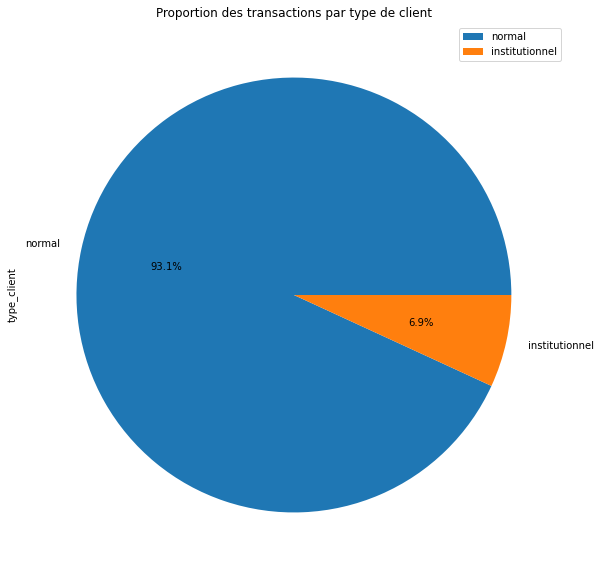

In [83]:
#Faisons maintenant la proportion entre clients normaux et clients institutionnels
plt.figure(figsize=(10,10))
products_transactions_customers['type_client'].value_counts(normalize=True).plot(
    kind='pie',
    legend=True,
    autopct='%1.1f%%')
plt.title('Proportion des transactions par type de client')
plt.show()

On voit que les clients institutionnels réprésentent 6.9% des transactions et que le reste des transactions est attribuée aux clients normaux.

#### Impact des clients institutionnels sur la Courbe de Lorenz et l'indice de Gini <a class="anchor" id="section_2_6_2"></a>

Regardons maintenant l'impact des clients institutionnels sur le CA généré par client en traçant une courbe de Lorenz en excluant ces clients institutionnels.


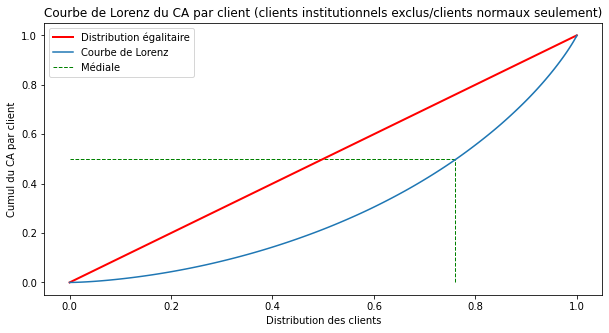

In [84]:
#Faisons maintenant un group by client id et sum sur normal
normal_top_flop = normal.groupby(['client_id'], as_index = False)
normal_top_flop = normal_top_flop.sum()

#Faisons maintenant une courbe de Lorenz pour afficher la répartition du CA par client
CA_client = normal_top_flop['price'].values
n = len(CA_client)
lorenz = np.cumsum(np.sort(CA_client)) / CA_client.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

xaxis = np.linspace(0-1/n,1+1/n,n+1) 
#Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. 
# Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.figure(figsize = (10,5))
plt.plot([0, 1], [0, 1], 'r-', lw=2, label='Distribution égalitaire')
plt.vlines(x=.76, ymin=0, ymax=.5, color='green', linestyle='--', linewidth=1, label='Médiale')
plt.hlines(xmin=.76, xmax=0, y=.5, color='green', linestyle='--', linewidth=1)
plt.plot(xaxis,lorenz,drawstyle='steps-post', label='Courbe de Lorenz')
plt.ylabel("Cumul du CA par client")
plt.xlabel("Distribution des clients")
plt.title("Courbe de Lorenz du CA par client (clients institutionnels exclus/clients normaux seulement)")
plt.legend(loc="best")
plt.show()

On voit que 50% du CA cumulé représente 76% de la distribution des clients. On peut aussi dire que 24% des clients concentrent à eux seuls 50% du CA cumulé.

In [85]:
#Calculons maintenant l'indice de Gini pour voir si la répartition est égalitaire ou pas
#Spoiler : elle a tendance à l'être d'après la forme de la courbe de Lorenz mias n'est pas parfaite.
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
print("L'indice de Gini est de :", round(gini,2),".")

L'indice de Gini est de : 0.4 .


On voit que l'indice de Gini est plus faible donc plus proche de 0 les clients institutionnels ont donc tendance à creuser les inégalités de CA entre les clients.

#### Caractéristiques des clients institutionnels <a class="anchor" id="section_2_6_3"></a>

#### Tableau récapitulatif des clients institutionnels

In [86]:
#Reprenons institutionnel 
institutionnel.head()

,id_prod,price,categ,date,session_id,client_id,Année,Mois,Jour,Jour Semaine,sex,birth,Âge,tranche_age,type_client
442,0_1277,7.99,0.0,2022-06-18 15:44:33.155329,s_225667,c_6714,2022,6,18,5,f,1968,55,50-60,institutionnel
443,1_661,22.99,1.0,2022-09-13 10:18:02.746197,s_267366,c_6714,2022,9,13,1,f,1968,55,50-60,institutionnel
444,0_1340,14.76,0.0,2021-10-13 16:03:24.117055,s_104247,c_6714,2021,10,13,2,f,1968,55,50-60,institutionnel
445,1_446,23.92,1.0,2022-02-04 14:53:30.833353,s_159894,c_6714,2022,2,4,4,f,1968,55,50-60,institutionnel
446,1_445,23.99,1.0,2022-08-24 05:38:17.574112,s_257657,c_6714,2022,8,24,2,f,1968,55,50-60,institutionnel


In [87]:
#Affichons maintenant le total des ventes par client
institutionnel_tv = institutionnel.groupby(['client_id'], as_index = False)
institutionnel_tv = institutionnel_tv.count()
institutionnel_tv['nombre total de ventes'] = institutionnel_tv['price']
institutionnel_tv = institutionnel_tv[['client_id','nombre total de ventes']]
institutionnel_tv.head()

,client_id,nombre total de ventes
0,c_1609,25488
1,c_3454,6773
2,c_4958,5195
3,c_6714,9187


In [88]:
#Affichons maintenant le panier moyen par client
institutionnel_pm = institutionnel.groupby(['client_id'], as_index = False)
institutionnel_pm = institutionnel_pm.mean()
institutionnel_pm['panier moyen par client'] = institutionnel_pm['price']
institutionnel_pm = institutionnel_pm[['client_id','panier moyen par client','birth', 'Âge']]
institutionnel_pm.head()

,client_id,panier moyen par client,birth,Âge
0,c_1609,12.713173,1980.0,43.0
1,c_3454,16.782791,1969.0,54.0
2,c_4958,55.776774,1999.0,24.0
3,c_6714,16.726107,1968.0,55.0


In [89]:
#Réaffichons maintenant le montant total d'achat des clients
institutionnel_mt = institutionnel.groupby(['client_id'], as_index = False)
institutionnel_mt = institutionnel_mt.sum()
institutionnel_mt['montant_total_achat'] = institutionnel_mt['price']
institutionnel_mt = institutionnel_mt[['client_id','montant_total_achat']]
institutionnel_mt.head()

,client_id,montant_total_achat
0,c_1609,324033.350000
1,c_3454,113669.844564
2,c_4958,289760.340000
3,c_6714,153662.749128


In [90]:
#Faisons la jointure entre ces 3 dataframes pour avoir un récapitulatif des profils des 4 clients institutionnels
institutionnel_tv_pm = pd.merge(institutionnel_tv, institutionnel_pm, on='client_id')
institutionnel_tv_pm_mt = pd.merge(institutionnel_tv_pm, institutionnel_mt, on='client_id')
institutionnel_tv_pm_mt.head(4)

,client_id,nombre total de ventes,panier moyen par client,birth,Âge,montant_total_achat
0,c_1609,25488,12.713173,1980.0,43.0,324033.350000
1,c_3454,6773,16.782791,1969.0,54.0,113669.844564
2,c_4958,5195,55.776774,1999.0,24.0,289760.340000
3,c_6714,9187,16.726107,1968.0,55.0,153662.749128


In [91]:
#On peut en outre créer une colonne ventes mensuelles moyenne
institutionnel_tv_pm_mt['ventes_mensuelles_moyenne'] = institutionnel_tv_pm_mt['nombre total de ventes'] / 24
institutionnel_tv_pm_mt.head(4)

,client_id,nombre total de ventes,panier moyen par client,birth,Âge,montant_total_achat,ventes_mensuelles_moyenne
0,c_1609,25488,12.713173,1980.0,43.0,324033.350000,1062.000000
1,c_3454,6773,16.782791,1969.0,54.0,113669.844564,282.208333
2,c_4958,5195,55.776774,1999.0,24.0,289760.340000,216.458333
3,c_6714,9187,16.726107,1968.0,55.0,153662.749128,382.791667


#### Nombre de transactions des clients institutionnels par catégorie

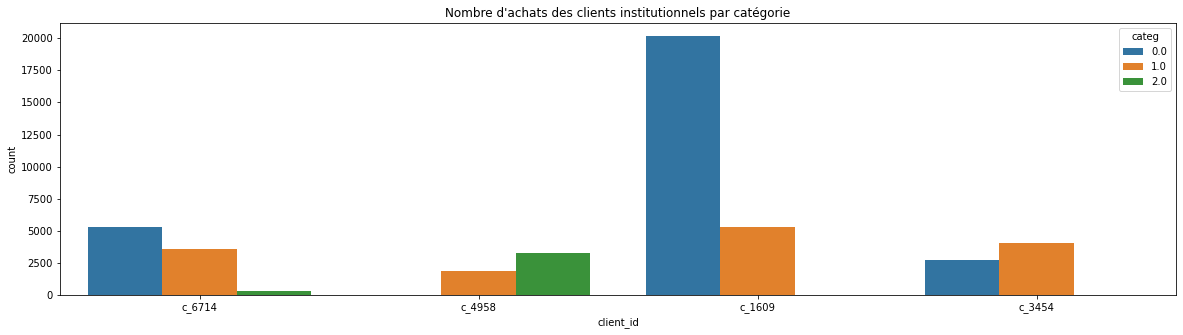

In [92]:
#Représentons maintenant le nombre de transactions des clients institutionnels par catégorie
plt.figure(figsize=(20,5))
sns.countplot(data=institutionnel, x='client_id', hue='categ')
plt.title("Nombre d'achats des clients institutionnels par catégorie")
plt.show()

On voit que c_1609 et c_3454 n'achètent pas du tout la catégorie 2, c_1609 achète une quantité astronomique au niveau de la 
catégorie 1, tandis que c_6714 achète très peu de catégorie 2 qui est surtout consommée par c_4958.

#### Distribution des prix des livres achetées par nos clients institutionnels

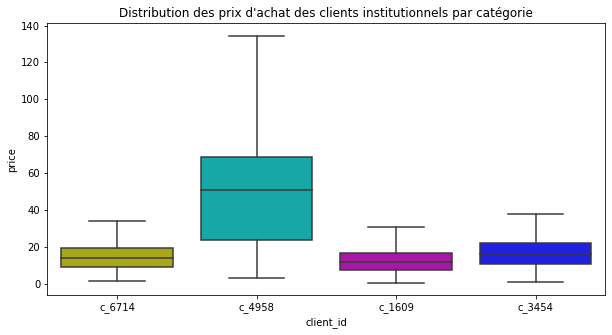

In [101]:
#Faisons maintenant un box plot pour voir la distribution des prix des livres achetées par nos clients institutionnels
plt.figure(figsize=(10,5))
my_pal = {"c_6714": "y", "c_4958": "c", "c_1609":"m", "c_3454": "b"}
sns.boxplot(data=institutionnel, y='price', x='client_id', showfliers=False, palette=my_pal)
plt.title('Distribution des prix d\'achat des clients institutionnels par catégorie')
plt.show()

On voit que c_4958 achète des livres plus chers que les autres clients ce doit être des livres de catégories 2 au vue du graphique précédent.

### Étape 3 - Étude des liens entre les différentes variables <a class="anchor" id="chapitre_3"></a>

Tout d'abord il faut savoir quels sont les types de variables que l'on a.

Nous avons des variables quantitatives : 
- le prix des produits.
- l'âge des clients.

Nous avons des variables qualitatives : 
- le sexe des clients.
- les catégories de produits.
- les dates des transactions.
- l'identifiant client.
- l'identifiant produit.
- l'identifiant de session.

#### Lien entre le genre d’un client et les catégories des livres achetés <a class="anchor" id="section_3_1"></a>

#### Tableau de contingence entre le genre d'un client et les catégories de livres achetés <a class="anchor" id="section_3_1_1"></a>

In [94]:
#On affiche le tableau de contingence entre le genre d'un client et les catégories de livres achetées
X = "sex"
Y = "categ"

cont = normal[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len)
cont

categ,0.0,1.0,2.0
sex,,,
f,200904,111331,16980
m,186589,101017,15868


In [96]:
#On affiche le tableau de contingence entre le genre d'un client et les catégories de livres achetées avec les totaux
X1 = "sex"
Y1 = "categ"

cont1 = normal[[X1,Y1]].pivot_table(index=X1,columns=Y1,aggfunc=len, margins=True, margins_name="Total")
cont1

categ,0.0,1.0,2.0,Total
sex,,,,
f,200904,111331,16980,329215
m,186589,101017,15868,303474
Total,387493,212348,32848,632689


#### Heatmap de la relation entre le genre d'un client et les catégories de livres achetés <a class="anchor" id="section_3_1_2"></a>

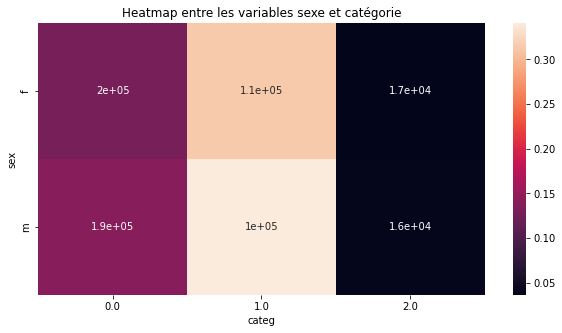

In [97]:
#On affiche la heatmap 
#Les lignes 1 à 6 calculent le tableau  indep, qui est le tableau représentant le cas d'indépendance. 
#Il fait intervenir le produit matriciel (avec  .dot()).
tx = cont1.loc[:,["Total"]]
ty = cont1.loc[["Total"],:]
n = len(normal)
indep = tx.dot(ty) / n

c = cont1.fillna(0)  # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep  # measure  contient tous les ξij pour chaque case du tableau. 
# On peut ensuite calculer les contributions (que nous avons définies plus haut) en divisant chaque ξij par ξn 
# (placé dans la variable xi_n). 
xi_n = measure.sum().sum()
table = measure/xi_n  # On fait ceci en ligne 11 par  measure/xi_n. 
# On obtient ainsi pour chaque case une valeur comprise entre 0 et 1, qui nous sert à étalonner la couleur.

plt.figure(figsize=(10,5))
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.title('Heatmap entre les variables sexe et catégorie')
plt.show()

On voit qu'il y a 4 cases sur les 6 qui sont foncées donc possibles sources de non-indépendance.

#### Test d'indépendance du Khi-2 <a class="anchor" id="section_3_1_3"></a>

On fait l'hypothèse nulle que la variable sexe et catégorie sont indépendantes. Voyons voir si on rejète l'hypothèse nulle ou pas c'est-à-dire si la p-value est en-dessous du seuil de 1% ou pas.

In [95]:
#On fait le test d'indépendance du Khi-2
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)

print("La valeur du X² est de", st_chi2,".")
print("La valeur de la p-value est de", st_p, ".")
print("Le nombre de degrés de libertés est de", st_dof, ".")
print("Le tableau des fréquences attendues est : \n", st_exp)

La valeur du X² est de 20.200173796862927 .
La valeur de la p-value est de 4.1075985631484716e-05 .
Le nombre de degrés de libertés est de 2 .
Le tableau des fréquences attendues est : 
 [[201629.09106212 110493.69725094  17092.21168694]
 [185863.90893788 101854.30274906  15755.78831306]]


La p-value est en dessous du seuil de 1% donc on rejète l'hypothèse nulle et donc les variables sexe et catégorie sont dépendantes. 

#### Lien entre l'âge des clients et le montant total des achats <a class="anchor" id="section_3_2"></a>

#### Création du Dataframe préalable à la représentation graphique <a class="anchor" id="section_3_2_1"></a>

In [97]:
Normal_lien_age_achats = normal.groupby('Âge').sum().reset_index()
Normal_lien_age_achats = Normal_lien_age_achats[['Âge', 'price']].sort_values(by='Âge', ascending=True)
Normal_lien_age_achats.head()

,Âge,price
0,19,609013.690000
1,20,178195.780000
2,21,184209.264564
3,22,178497.700000
4,23,165029.256376


#### Coefficient de Pearson et covariance entre âge et montant total des achats <a class="anchor" id="section_3_2_2"></a>

In [115]:
print("Le coefficient de Pearson est de :")
print(st.pearsonr(Normal_lien_age_achats["Âge"],Normal_lien_age_achats["price"])[0])
print("-------------------------------------------------------------------------------")
print("La covariance est de :")
print(np.cov(Normal_lien_age_achats["Âge"],Normal_lien_age_achats["price"],ddof=0)[1,0])
print("-------------------------------------------------------------------------------")
print("Le coefficient de Spearman est de :")
print(st.spearmanr(Normal_lien_age_achats["Âge"],Normal_lien_age_achats["price"]))

Le coefficient de Pearson est de :
-0.8305992097390333
-------------------------------------------------------------------------------
La covariance est de :
-2042031.9427869145
-------------------------------------------------------------------------------
Le coefficient de Spearman est de :
SpearmanrResult(correlation=-0.8736842105263158, pvalue=7.352708223159905e-25)


#### Graphique du lien entre l'âge des clients et le montant total des achats <a class="anchor" id="section_3_2_3"></a>

Text(0.5, 1.0, "Montant des achats totaux en fonction de l'âge")

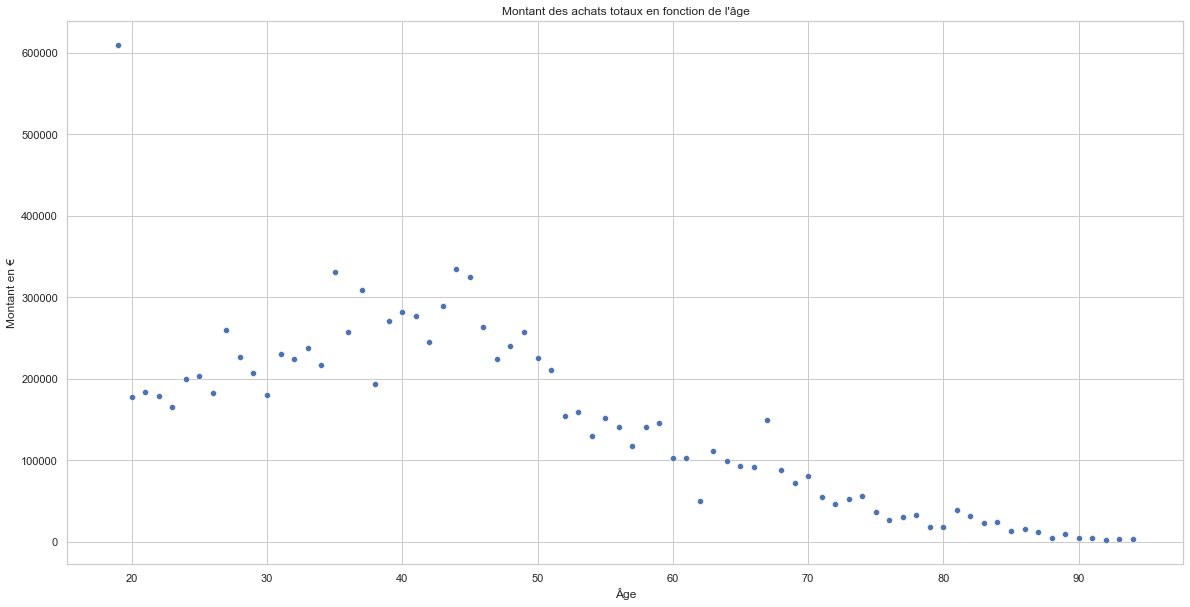

In [99]:
Normal_lien_age_achats_graph = Normal_lien_age_achats.groupby(["Âge"])["price"].sum()

sns.set(rc={'figure.figsize':(20,10)})
with sns.axes_style("whitegrid"):
    sns.scatterplot(data=Normal_lien_age_achats_graph)

plt.ylabel("Montant en €")
plt.xlabel("Âge")
plt.title("Montant des achats totaux en fonction de l'âge")

#### Lien entre âge des clients et fréquence d'achat <a class="anchor" id="section_3_3"></a>

#### Création d'un nouveau Dataframe préalable à la représentation graphique <a class="anchor" id="section_3_3_1"></a>

In [100]:
Normal_lien_age_freq = normal.groupby('Âge').count().reset_index()
Normal_lien_age_freq = Normal_lien_age_freq[['Âge', 'session_id']]
Normal_lien_age_freq.head()

,Âge,session_id
0,19,15149
1,20,4371
2,21,4587
3,22,4252
4,23,4415


In [101]:
Normal_lien_age_freq['frequence'] = Normal_lien_age_freq['session_id'] / sum(Normal_lien_age_freq['session_id'])
Normal_lien_age_freq.head()

,Âge,session_id,frequence
0,19,15149,0.023944
1,20,4371,0.006909
2,21,4587,0.007250
3,22,4252,0.006721
4,23,4415,0.006978


#### Représentation graphique du lien entre âge des clients et fréquence d'achat <a class="anchor" id="section_3_3_2"></a>

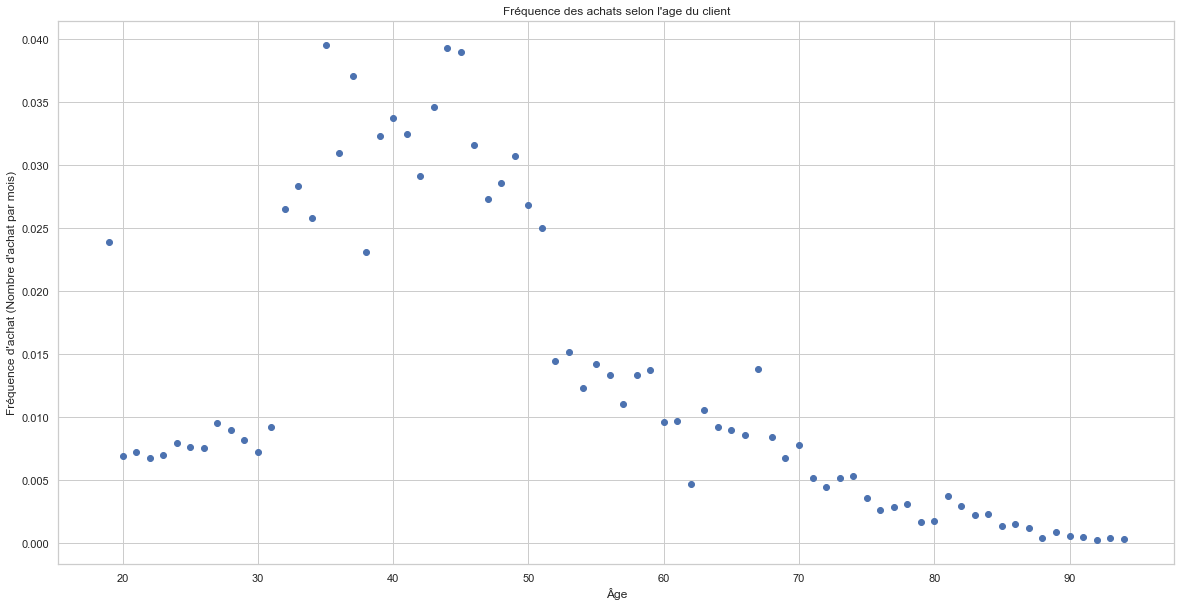

In [102]:
with sns.axes_style("whitegrid"):
    plt.plot(Normal_lien_age_freq.Âge, Normal_lien_age_freq.frequence, 'o')
plt.xlabel('Âge')
plt.ylabel("Fréquence d'achat (Nombre d'achat par mois)")
plt.title('Fréquence des achats selon l\'age du client')
plt.show()

#### Coefficient de Pearson et covariance entre âge et fréquence des achats <a class="anchor" id="section_3_3_3"></a>

In [116]:
print("Le coefficient de Pearson est de :")
print(st.pearsonr(Normal_lien_age_freq["Âge"],Normal_lien_age_freq["frequence"])[0])
print("-------------------------------------------------------------------------------")
print("La covariance est de :")
print(np.cov(Normal_lien_age_freq["Âge"],Normal_lien_age_freq["frequence"],ddof=0)[1,0])
print("-------------------------------------------------------------------------------")
print("Le coefficient de Spearman est de :")
print(st.spearmanr(Normal_lien_age_freq["Âge"],Normal_lien_age_freq["frequence"]))

Le coefficient de Pearson est de :
-0.5744026332971888
-------------------------------------------------------------------------------
La covariance est de :
-0.1484969313517383
-------------------------------------------------------------------------------
Le coefficient de Spearman est de :
SpearmanrResult(correlation=-0.6738482570061518, pvalue=2.5391854434818517e-11)


On  voit qu'on a 3 groupes qui se distinguent : créons un Dataframe spécial pour chacun de ces groupes (20-31, 32-51 et plus de 51 ans) puis appliquons le coefficient de Pearson dessus.

In [104]:
#Reprenons normal
normal.head()

,id_prod,price,categ,date,session_id,client_id,Année,Mois,Jour,Jour Semaine,sex,birth,Âge,tranche_age,type_client
0,0_1518,4.18,0.0,2022-05-20 13:21:29.043970,s_211425,c_103,2022,5,20,4,f,1986,37,30-40,normal
1,0_1627,3.99,0.0,2022-06-18 05:55:31.816994,s_225494,c_103,2022,6,18,5,f,1986,37,30-40,normal
2,0_1104,13.21,0.0,2023-02-08 17:31:06.898425,s_338755,c_103,2023,2,8,2,f,1986,37,30-40,normal
3,0_1390,19.37,0.0,2021-04-20 06:18:39.939761,s_23078,c_103,2021,4,20,1,f,1986,37,30-40,normal
4,0_1547,8.99,0.0,2022-03-15 19:54:53.904123,s_179629,c_103,2022,3,15,1,f,1986,37,30-40,normal


In [110]:
#Sélection / filtrage en fonction de l'âge des clients (20 à 31 ans)
Normal_lien_age_freq_premier = normal[ (normal['Âge'] >= 20) & (normal['Âge'] < 32)]
Normal_lien_age_freq_premier = Normal_lien_age_freq_premier.groupby('Âge').count().reset_index()
Normal_lien_age_freq_premier = Normal_lien_age_freq_premier[['Âge', 'session_id']]
Normal_lien_age_freq_premier['frequence'] = Normal_lien_age_freq_premier['session_id'] / sum(Normal_lien_age_freq_premier['session_id'])
Normal_lien_age_freq_premier.head(12)

,Âge,session_id,frequence
0,20,4371,0.073445
1,21,4587,0.077074
2,22,4252,0.071445
3,23,4415,0.074184
4,24,5046,0.084787
5,25,4840,0.081325
6,26,4758,0.079948
7,27,6028,0.101287
8,28,5668,0.095238
9,29,5179,0.087022


In [117]:
print("Le coefficient de Pearson est de :")
print(st.pearsonr(Normal_lien_age_freq_premier["Âge"],Normal_lien_age_freq_premier["frequence"])[0])
print("-------------------------------------------------------------------------------")
print("La covariance est de :")
print(np.cov(Normal_lien_age_freq_premier["Âge"],Normal_lien_age_freq_premier["frequence"],ddof=0)[1,0])
print("-------------------------------------------------------------------------------")
print("Le coefficient de Spearman est de :")
print(st.spearmanr(Normal_lien_age_freq_premier["Âge"],Normal_lien_age_freq_premier["frequence"]))

Le coefficient de Pearson est de :
0.6578559511263768
-------------------------------------------------------------------------------
La covariance est de :
0.021856201902073463
-------------------------------------------------------------------------------
Le coefficient de Spearman est de :
SpearmanrResult(correlation=0.6713286713286714, pvalue=0.016831456186893395)


In [111]:
#Sélection / filtrage en fonction de l'âge des clients (32 à 51 ans)
Normal_lien_age_freq_deuxieme = normal[ (normal['Âge'] >= 32) & (normal['Âge'] < 52)]
Normal_lien_age_freq_deuxieme = Normal_lien_age_freq_deuxieme.groupby('Âge').count().reset_index()
Normal_lien_age_freq_deuxieme = Normal_lien_age_freq_deuxieme[['Âge', 'session_id']]
Normal_lien_age_freq_deuxieme['frequence'] = Normal_lien_age_freq_deuxieme['session_id'] / sum(Normal_lien_age_freq_deuxieme['session_id'])
Normal_lien_age_freq_deuxieme.head(20)

,Âge,session_id,frequence
0,32,16784,0.042630
1,33,17955,0.045605
2,34,16329,0.041475
3,35,25005,0.063511
4,36,19611,0.049811
5,37,23475,0.059625
6,38,14638,0.037180
7,39,20459,0.051965
8,40,21371,0.054281
9,41,20573,0.052254


In [118]:
print("Le coefficient de Pearson est de :")
print(st.pearsonr(Normal_lien_age_freq_deuxieme["Âge"],Normal_lien_age_freq_deuxieme["frequence"])[0])
print("-------------------------------------------------------------------------------")
print("La covariance est de :")
print(np.cov(Normal_lien_age_freq_deuxieme["Âge"],Normal_lien_age_freq_deuxieme["frequence"],ddof=0)[1,0])
print("-------------------------------------------------------------------------------")
print("Le coefficient de Spearman est de :")
print(st.spearmanr(Normal_lien_age_freq_deuxieme["Âge"],Normal_lien_age_freq_deuxieme["frequence"]))

Le coefficient de Pearson est de :
-0.062020371782632075
-------------------------------------------------------------------------------
La covariance est de :
-0.002759772421325343
-------------------------------------------------------------------------------
Le coefficient de Spearman est de :
SpearmanrResult(correlation=-0.05714285714285714, pvalue=0.8108800461568323)


In [113]:
#Sélection / filtrage en fonction de l'âge des clients (plus de 51 ans)
Normal_lien_age_freq_troisieme = normal[ normal['Âge'] > 51 ]
Normal_lien_age_freq_troisieme = Normal_lien_age_freq_troisieme.groupby('Âge').count().reset_index()
Normal_lien_age_freq_troisieme = Normal_lien_age_freq_troisieme[['Âge', 'session_id']]
Normal_lien_age_freq_troisieme['frequence'] = Normal_lien_age_freq_troisieme['session_id'] / sum(Normal_lien_age_freq_troisieme['session_id'])
Normal_lien_age_freq_troisieme.head(50)

,Âge,session_id,frequence
0,52,9133,0.055582
1,53,9589,0.058357
2,54,7775,0.047317
3,55,9003,0.054791
4,56,8454,0.051450
5,57,6986,0.042516
6,58,8424,0.051267
7,59,8688,0.052874
8,60,6103,0.037142
9,61,6132,0.037318


In [119]:
print("Le coefficient de Pearson est de :")
print(st.pearsonr(Normal_lien_age_freq_troisieme["Âge"],Normal_lien_age_freq_troisieme["frequence"])[0])
print("-------------------------------------------------------------------------------")
print("La covariance est de :")
print(np.cov(Normal_lien_age_freq_troisieme["Âge"],Normal_lien_age_freq_troisieme["frequence"],ddof=0)[1,0])
print("-------------------------------------------------------------------------------")
print("Le coefficient de Spearman est de :")
print(st.spearmanr(Normal_lien_age_freq_troisieme["Âge"],Normal_lien_age_freq_troisieme["frequence"]))

Le coefficient de Pearson est de :
-0.9374758323586257
-------------------------------------------------------------------------------
La covariance est de :
-0.2160897295455099
-------------------------------------------------------------------------------
Le coefficient de Spearman est de :
SpearmanrResult(correlation=-0.9630021141649048, pvalue=5.767502279748666e-25)


#### Lien entre l'âge et la taille du panier moyen <a class="anchor" id="section_3_4"></a>

#### Création d'un nouveau Dataframe préalable à la représentation graphique <a class="anchor" id="section_3_4_1"></a>

In [121]:
#Première agrégation selon âge et session id
Normal_lien_age_pm = normal.groupby(['Âge', 'session_id']).count().reset_index()
#Seconde agrégation en moyenne de produits achetés
Normal_lien_age_pm = Normal_lien_age_pm.groupby('Âge').mean().reset_index()
Normal_lien_age_pm = Normal_lien_age_pm[['Âge', 'id_prod']]
Normal_lien_age_pm.head()

,Âge,id_prod
0,19,1.762741
1,20,1.702766
2,21,1.761521
3,22,1.749074
4,23,1.823627


#### Représentation graphique du lien entre l'âge et la taille du panier moyen <a class="anchor" id="section_3_4_2"></a>

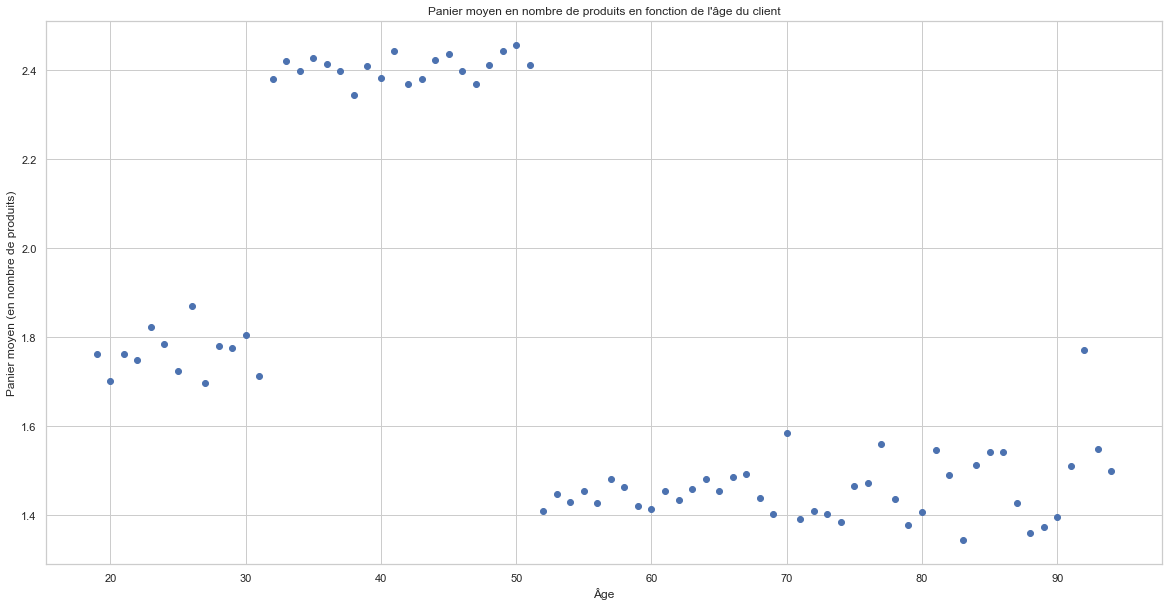

In [159]:
#Visualisation avec un scatterplot
with sns.axes_style("whitegrid"):
    plt.plot(Normal_lien_age_pm.Âge, Normal_lien_age_pm.id_prod, 'o')

plt.xlabel('Âge')
plt.ylabel('Panier moyen (en nombre de produits)')
plt.title('Panier moyen en nombre de produits en fonction de l\'âge du client')
plt.show()

#### Coefficient de Pearson et covariance entre âge et panier moyen <a class="anchor" id="section_3_4_3"></a>

In [122]:
print("Le coefficient de Pearson est de :")
print(st.pearsonr(Normal_lien_age_pm["Âge"],Normal_lien_age_pm["id_prod"])[0])
print("-------------------------------------------------------------------------------")
print("La covariance est de :")
print(np.cov(Normal_lien_age_pm["Âge"],Normal_lien_age_pm["id_prod"],ddof=0)[1,0])
print("-------------------------------------------------------------------------------")
print("Le coefficient de Spearman est de :")
print(st.spearmanr(Normal_lien_age_pm["Âge"],Normal_lien_age_pm["id_prod"]))

Le coefficient de Pearson est de :
-0.5878673272405263
-------------------------------------------------------------------------------
La covariance est de :
-5.220755665937072
-------------------------------------------------------------------------------
Le coefficient de Spearman est de :
SpearmanrResult(correlation=-0.631742993848257, pvalue=9.392789651862638e-10)


#### Lien entre l'âge et la catégorie de livres achetés <a class="anchor" id="section_3_5"></a>

Comme on a une variable quantitative et une variable qualitative on va utiliser l'analyse de la variance (ANOVA).
Mais avant, on affiche sous forme de boxplot les distributions des âges au sein des catégories en affichant la moyenne pour chaque boxplot.

#### Représentation graphique des distribution des âges par catégorie <a class="anchor" id="section_3_5_1"></a>

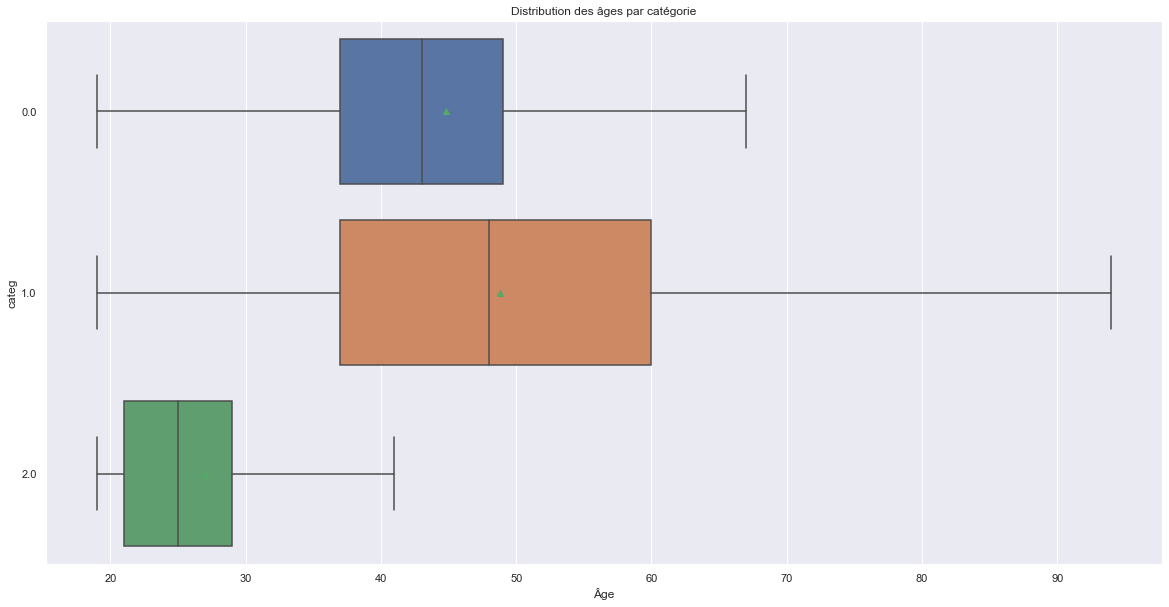

In [161]:
#On affiche le graphique

sns.boxplot(data=normal, x='Âge', y='categ', orient='h', showfliers=False, showmeans=True)
plt.title('Distribution des âges par catégorie')
plt.show()

#### Analysis of Variance (ANOVA) <a class="anchor" id="section_3_5_2"></a>

In [162]:
#On fait une ANOVA
X = "categ" # qualitative
Y = "Âge" # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print("L'ETA Squared est de ", round(eta_squared(normal.categ, normal.Âge),2),".")

L'ETA Squared est de  0.11 .
